![](https://cocalc.com/blobs/FullLogo_200x160.png?uuid=e2a635d0-26b8-40d1-b1c7-d0fc4fb06bd7)

## **Data Analysis with Python**



## **Capstone Project**

#### **Business Context**

With growing demands and cut\-throat competitions in the market, a Superstore Giant would like to design a customer loyalty program that strengthens its relationship with its' customers and incentivizes repeat purchases. The objective of the loyalty program is to increase customer retention and drive incremental sales by targeting customers with personalized promotional offers. The company's marketing manager has proposed to implement a tier\-based marketing campaign where customers are offered cash rewards as incentives towards their first purchase following enrollment into the loyalty program. The proposed cash reward offers are as follows:

1. Get \$200 on first purchase
2. Get \$100 on first purchase
3. Get \$25 on first purchase

The Superstore Giant is seeking your knowledge in identifying which customers should get what offer as this requires understanding the customers' buying behaviors. In addition, they would like to understand which products, regions, categories and customer segments they should target or avoid.

You have been provided access to the customer transaction database contained in the Superstore.csv file and asked to provide valuable insights into customer behavior by grouping customers into different segments based on their buying behavior and loyalty to the business.

To help guide your analysis, perform a value\-based customer segmentation analysis \(also known as RFM Segmentation\) using customers' transaction histories to group the customer base into different value segments. The final output of your analysis should be a table containing customer Ids, customer value segment and your cash reward recommendation. The output of your analysis should include recommendations on which products, regions, categories and customer segments the Superstore Giant should target or avoid.



In [3]:
# retention through RFM
# recency = most recent date - last customer purchase
# Frequency = how many times within a time frame a purchase was made
# Monetary = what is the total amount of money spent within the slected time frame.
# import pandas
# read the csv file
# check the first 5 row of the file
# check the size
# check for missing value using nunique
# fillna or dropna
# convert the data types especially date type
# cal recency with a function, give it a score 
# cal frequency using unique on date column
# cal monetary on sales column across each customers




#### <span style='color:#ffffff; font-size'>**Dataset Overview**</span>



Below provides the description of columns contained in the Superstore.csv dataset.

1. **Row ID**: Unique identifier for each row.

2. **Order ID**: Unique Order ID for each Customer.

3. **Order Date**: Order Date of the product.

4. **Ship Date**: Shipping Date of the Product.

5. **Ship Mode**: Shipping Mode specified by the Customer.

6. **Customer ID**: Unique ID to identify each Customer.

7. **Customer Name**: Name of the Customer.

8. **Segment**: The segment where the Customer belongs.

9. **Country**: Country of residence of the Customer.

10. **City**: City of residence of the Customer.

11. **State**: State of residence of the Customer.

12. **Postal Code**: Postal Code of every Customer.

13. **Region**: Region where the Customer belongs.

14. **Product ID**: Unique ID of the Product.

15. **Category**: Category of the product ordered.

16. **Sub\-Category**: Sub\-Category of the product ordered.

17. **Product Name**: Name of the Product.

18. **Sales**: Sales of the Product.

19. **Quantity**: Quantity of the Product.

20. **Discount**: Discount provided.

21. **Profit**: Profit/Loss incurred.



#### **RFM Segmentation Overview**

The following web links are reference articles that provide information about what RFM Analysis is and how to perform it.

https://patchretention.com/blog/how\-to\-calculate\-rfm\-score

[https://www.actioniq.com/blog/what\-is\-rfm\-analysis/\#:~:text=RFM analysis is a way,ve engaged with a brand](https://www.actioniq.com/blog/what-is-rfm-analysis/#:~:text=RFM%20analysis%20is%20a%20way,ve%20engaged%20with%20a%20brand) 

[https://www.optimove.com/resources/learning\-center/rfm\-segmentation](https://www.optimove.com/resources/learning-center/rfm-segmentation) 


#### <span style='color: white; background-color'>**Preliminary Data Exploration & Preprocessing**</span>



##### <span style='color: white; background-color'>**Importing Necessary Libraries & Loading the Dataset**</span>



In [4]:
# Import all necessary Python libraries necessary for the project
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

In [5]:
# Load the dataset

superstore = pd.read_csv("Superstore.csv")


In [6]:
# Check top few rows
superstore.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# Check the total number of rows and columns
superstore.shape


(9994, 21)

In [8]:
# Check the number of missing values by column
pd.isnull(superstore).sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
# Check number of unique values in each column

superstore.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [10]:
# Check the data type of values in each column

superstore.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [11]:
# Check for Duplicate transaction records

superstore[superstore.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [12]:
# Remove duplicate records from the dataset and check the number of records remaining

# zero duplicate


In [13]:
# Convert the string date columns to date type

superstore["Order Date"] = pd.to_datetime(superstore["Order Date"])
superstore.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [14]:
# Check the date range (min and max) of Transaction Orders in the dataset

superstore["Order Date"].describe()



count                             9994
mean     2016-04-30 00:07:12.259355648
min                2014-01-03 00:00:00
25%                2015-05-23 00:00:00
50%                2016-06-26 00:00:00
75%                2017-05-14 00:00:00
max                2017-12-30 00:00:00
Name: Order Date, dtype: object

In [15]:
# Get a Statitstical Summary of the dataset

superstore.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [16]:
# Check the total number of customers in the dataset

superstore["Customer Name"].nunique()

793

In [17]:
# Check the unique Customer Segments present in the dataset

superstore["Segment"].nunique()

3

In [18]:
# Check the unique Geographical Regions present in the dataset

superstore["Region"].nunique()

4

In [19]:
# Check the unique Product Categories present in the dataset

superstore["Category"].nunique()

3

### <span style='color:#ffffff; font-size'>**Customer Segmentation**</span>



### How can we categorize customers based on their purchasing behavior?

<br/>

We will explore customer purchasing behavior by segmenting customers using RFM analysis. Firstly, we will prepare our dataset for RFM analysis by performing some feature engineering.



##### Prepare Data for RFM Analysis



In [20]:
# Check the total number of customers in dataset

superstore["Customer Name"].nunique()

793

In [21]:
# Using transactions made in the last 2 years (730 days) to filter the dataset for RFM analysis. 

# Get the latest date to use as reference date 
latest_date = superstore["Order Date"].max()

# Get the the two years back date from latest date 
two_years_back = latest_date - pd.Timedelta(days=730)
two_years_back

# Filter the dataframe using order date column saved as obs_df
obs_df = superstore[superstore["Order Date"] >= two_years_back]

obs_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
12,13,CA-2017-114412,2017-04-15,4/20/2017,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432
13,14,CA-2016-161389,2016-12-05,12/10/2016,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9989,CA-2017-163629,2017-11-17,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [22]:
# Make ROW ID the index of the the filtered dataframe
obs_df.set_index("Row ID", inplace = True)

In [23]:
# Check the number of rows & columns in obs_df

obs_df.shape

(5910, 20)

In [24]:
# From obs_df, create a dataframe containing the necessary variables required for RFM Analysis: Customer ID, Transaction Date and Amount of Sales. Call the new dataframe order_sales.

order_sales = obs_df[["Customer ID","Order Date","Sales"]]
order_sales

,Customer ID,Order Date,Sales
Row ID,,,
1,CG-12520,2016-11-08,261.960
2,CG-12520,2016-11-08,731.940
3,DV-13045,2016-06-12,14.620
13,AA-10480,2017-04-15,15.552
14,IM-15070,2016-12-05,407.976
...,...,...,...
9989,RA-19885,2017-11-17,206.100
9991,DB-13060,2017-02-26,91.960
9992,DB-13060,2017-02-26,258.576


In [25]:
# check the column and row in the Order_sales dataframe
order_sales.shape

(5910, 3)

In [26]:
# Count the total number of customers in the order_sales dataframe. This is the total number of customers to be used for RFM Analysis.


order_sales["Customer ID"].nunique()


773

In [27]:
# Transform features to generate the RFM Variables: Recency, Frequency, and Monetary Value of transactions by customer. 


# code for a Recency function
def recency_fn(x):
    current_dt = most_recent_date + pd.Timedelta(1)
    return (current_dt - x).dt.days.min()



In [28]:
# Calculate recency using line of code with the recency_fn. 
most_recent_date = order_sales["Order Date"].max()

Recency_value = order_sales.groupby("Customer ID")["Order Date"].apply(lambda x: recency_fn(x))
Recency_value

Customer ID
AA-10315    184
AA-10375     19
AA-10480    259
AA-10645     55
AB-10015    415
           ... 
XP-21865     43
YC-21895      4
YS-21880      9
ZC-21910     54
ZD-21925    202
Name: Order Date, Length: 773, dtype: int64

In [29]:
# create recency column and insert value in a new DataFrame, called rfm_df
rfm_df = pd.DataFrame(Recency_value)

# rename column to recency
rfm_df.columns = ["Recency"]
rfm_df

,Recency
Customer ID,
AA-10315,184
AA-10375,19
AA-10480,259
AA-10645,55
AB-10015,415
...,...
XP-21865,43
YC-21895,4
YS-21880,9


In [30]:
# create frequency function
def freq_fn(x):
    freq = x.nunique()
    return freq

In [31]:
# Calculate Frequency
Frequency_value = order_sales.groupby("Customer ID")["Order Date"].apply(lambda x: freq_fn(x))
Frequency_value

Customer ID
AA-10315    2
AA-10375    4
AA-10480    3
AA-10645    3
AB-10015    1
           ..
XP-21865    7
YC-21895    3
YS-21880    5
ZC-21910    7
ZD-21925    4
Name: Order Date, Length: 773, dtype: int64

In [32]:
# add frequency to rfm table
rfm_df["Frequency"] = (Frequency_value)
rfm_df

,Recency,Frequency
Customer ID,,
AA-10315,184,2
AA-10375,19,4
AA-10480,259,3
AA-10645,55,3
AB-10015,415,1
...,...,...
XP-21865,43,7
YC-21895,4,3
YS-21880,9,5


In [33]:
# Create Monetary function 
def monetary_fn(x):
    Monetary = x.sum()
    return Monetary

In [34]:
# Calculate monetary value across all customer
Monetary_value = order_sales.groupby("Customer ID")["Sales"].apply(lambda x: monetary_fn(x))
Monetary_value

Customer ID
AA-10315    4780.552
AA-10375     737.020
AA-10480    1763.052
AA-10645    1681.145
AB-10015     563.940
              ...   
XP-21865    1265.694
YC-21895    2322.160
YS-21880    5340.264
ZC-21910    3442.799
ZD-21925    1249.184
Name: Sales, Length: 773, dtype: float64

In [35]:
# add to rfm table
rfm_df["Monetary"] = (Monetary_value)

# check the table
rfm_df

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,184,2,4780.552
AA-10375,19,4,737.020
AA-10480,259,3,1763.052
AA-10645,55,3,1681.145
AB-10015,415,1,563.940
...,...,...,...
XP-21865,43,7,1265.694
YC-21895,4,3,2322.160
YS-21880,9,5,5340.264


#### Segment Customers based on Recency, Frequency & Monetary Purchase



In [36]:
# Rank all customers based on each of the three RFM variables: Recency, Frequency & Monetary values


# to generate m_score, ranking monetary in quartiles
q=[0, .25, .5, .75, 1.]

# rank and saved in rfm dataframe as a column named m_score
rfm_df["m_score"] = pd.qcut(rfm_df['Monetary'], q=q, labels=[1,2,3,4]).astype(int)
rfm_df


,Recency,Frequency,Monetary,m_score
Customer ID,,,,
AA-10315,184,2,4780.552,4
AA-10375,19,4,737.020,2
AA-10480,259,3,1763.052,3
AA-10645,55,3,1681.145,3
AB-10015,415,1,563.940,2
...,...,...,...,...
XP-21865,43,7,1265.694,3
YC-21895,4,3,2322.160,4
YS-21880,9,5,5340.264,4


In [37]:
# generate f_score by ranking Frequency across customer and saved in rfm dataframe as a column named f_score
rfm_df["f_score"] = pd.qcut(rfm_df['Frequency'], q=q, labels=[1,2,3,4]).astype(int)
rfm_df

,Recency,Frequency,Monetary,m_score,f_score
Customer ID,,,,,
AA-10315,184,2,4780.552,4,1
AA-10375,19,4,737.020,2,2
AA-10480,259,3,1763.052,3,2
AA-10645,55,3,1681.145,3,2
AB-10015,415,1,563.940,2,1
...,...,...,...,...,...
XP-21865,43,7,1265.694,3,4
YC-21895,4,3,2322.160,4,2
YS-21880,9,5,5340.264,4,3


In [38]:
# generate r_score by ranking the recency using pd.qcut and save in a column under rfm_df
rfm_df["r_score"] = pd.qcut(rfm_df['Recency'], q=q, labels=[4,3,2,1]).astype(int)
rfm_df

,Recency,Frequency,Monetary,m_score,f_score,r_score
Customer ID,,,,,,
AA-10315,184,2,4780.552,4,1,1
AA-10375,19,4,737.020,2,2,4
AA-10480,259,3,1763.052,3,2,1
AA-10645,55,3,1681.145,3,2,3
AB-10015,415,1,563.940,2,1,1
...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,4,3
YC-21895,4,3,2322.160,4,2,4
YS-21880,9,5,5340.264,4,3,4


In [39]:
# Aggregate individual customer Recency, Frequency & Monetary scores to get customer RFM Scores
# Apply 40% scoring weight to the frequency and monetary scores, and 20% weight to the recency score. Name the new column rfm_score

r_weight = 0.2
f_weight = 0.4
m_weight = 0.4

# Generatesingle line of code to calculate rfm_score value and save in a column called rfm_score under rfm_df


rfm_df["rfm_score"] = (r_weight * rfm_df["r_score"])  + (f_weight * rfm_df["f_score"]) + (m_weight * rfm_df["m_score"])
rfm_df

,Recency,Frequency,Monetary,m_score,f_score,r_score,rfm_score
Customer ID,,,,,,,
AA-10315,184,2,4780.552,4,1,1,2.2
AA-10375,19,4,737.020,2,2,4,2.4
AA-10480,259,3,1763.052,3,2,1,2.2
AA-10645,55,3,1681.145,3,2,3,2.6
AB-10015,415,1,563.940,2,1,1,1.4
...,...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,4,3,3.4
YC-21895,4,3,2322.160,4,2,4,3.2
YS-21880,9,5,5340.264,4,3,4,3.6


In [40]:
# Assign customers to RFM value segments based on their RFM Scores using a line of code

rfm_df['value_segment'] = pd.qcut(rfm_df['rfm_score'], 3, labels=False) + 1
rfm_df

# NOte
# To Assign customers to RFM value segments label based on their RFM Scores you can use this a line of code
# rfm_df['value_segment_labelled'] = pd.qcut(rfm_df["rfm_score"], 3, labels = ["At risk", "Loyalists", "Champions"])

,Recency,Frequency,Monetary,m_score,f_score,r_score,rfm_score,value_segment
Customer ID,,,,,,,,
AA-10315,184,2,4780.552,4,1,1,2.2,2
AA-10375,19,4,737.020,2,2,4,2.4,2
AA-10480,259,3,1763.052,3,2,1,2.2,2
AA-10645,55,3,1681.145,3,2,3,2.6,2
AB-10015,415,1,563.940,2,1,1,1.4,1
...,...,...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,4,3,3.4,3
YC-21895,4,3,2322.160,4,2,4,3.2,3
YS-21880,9,5,5340.264,4,3,4,3.6,3


### **RFM Segment Analysis**



In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

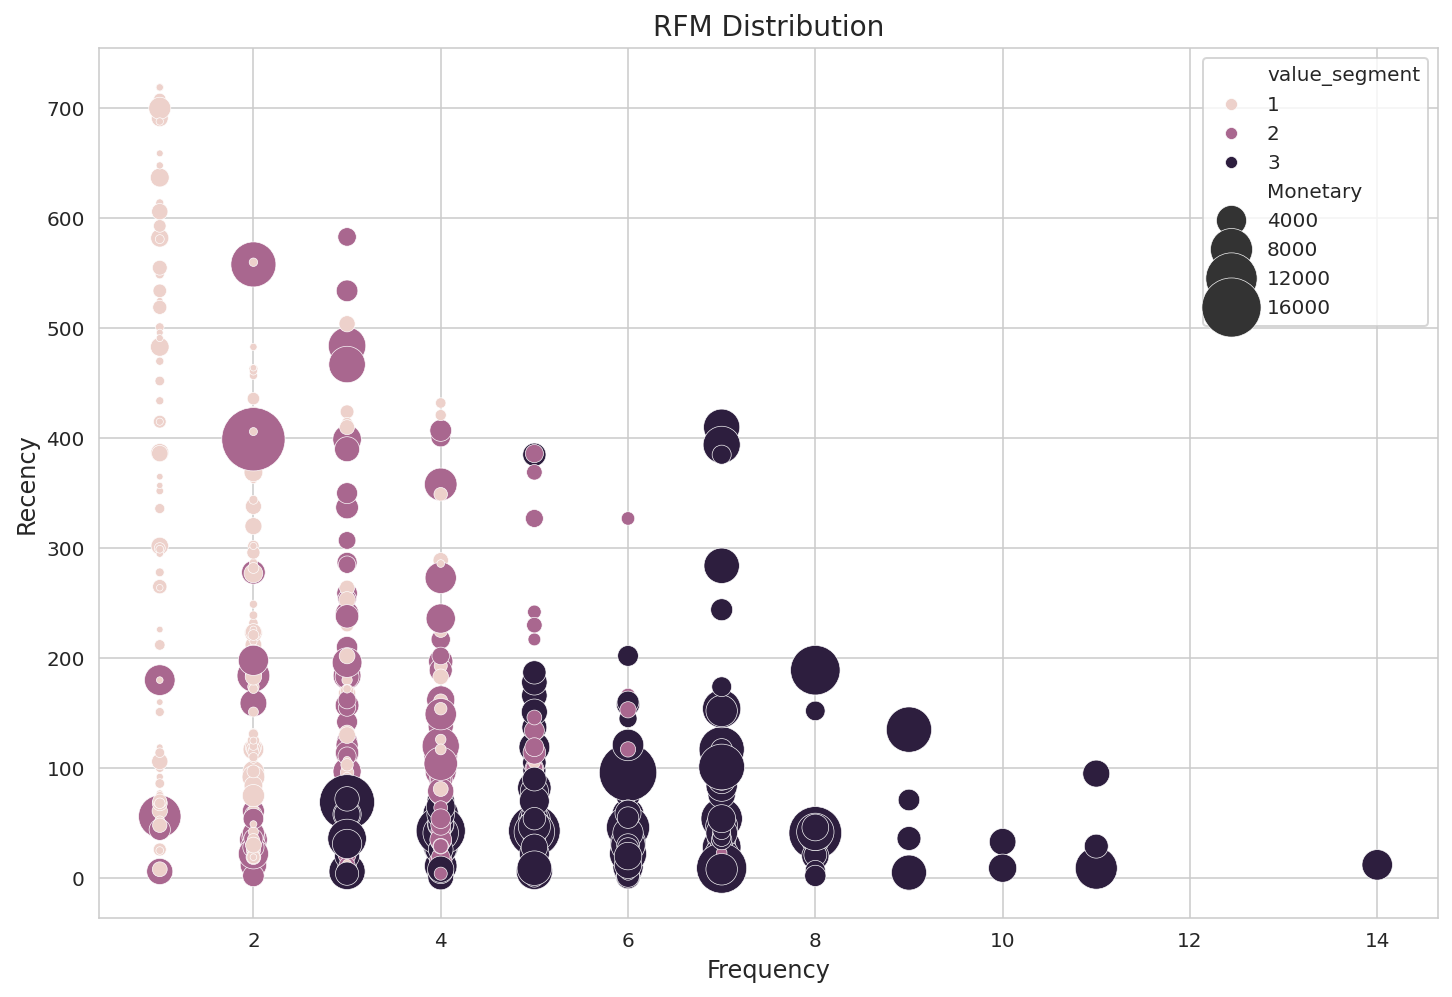

In [42]:
# To explore the distribution of customers' RFM profiles, Create a scatter plot of frequency versus recency, using monetary values as the size of the points.

fig, axes = plt.subplots(figsize=(12,8))
sns.scatterplot(rfm_df, x="Frequency", y="Recency", size="Monetary", sizes=(10, 1000), hue="value_segment"   )
axes.set_xlabel("Frequency", size= 12)
axes.set_ylabel("Recency", size= 12)
axes.set_title("RFM Distribution", size= 14)
plt.show()


<u>**Plot Discussion**</u>

The scatterplot shows that the higher the Frequency, the lower the Recency'

Also, the lower monetary clusters around low frequency, and the higher monetary value clusters around frequency median value



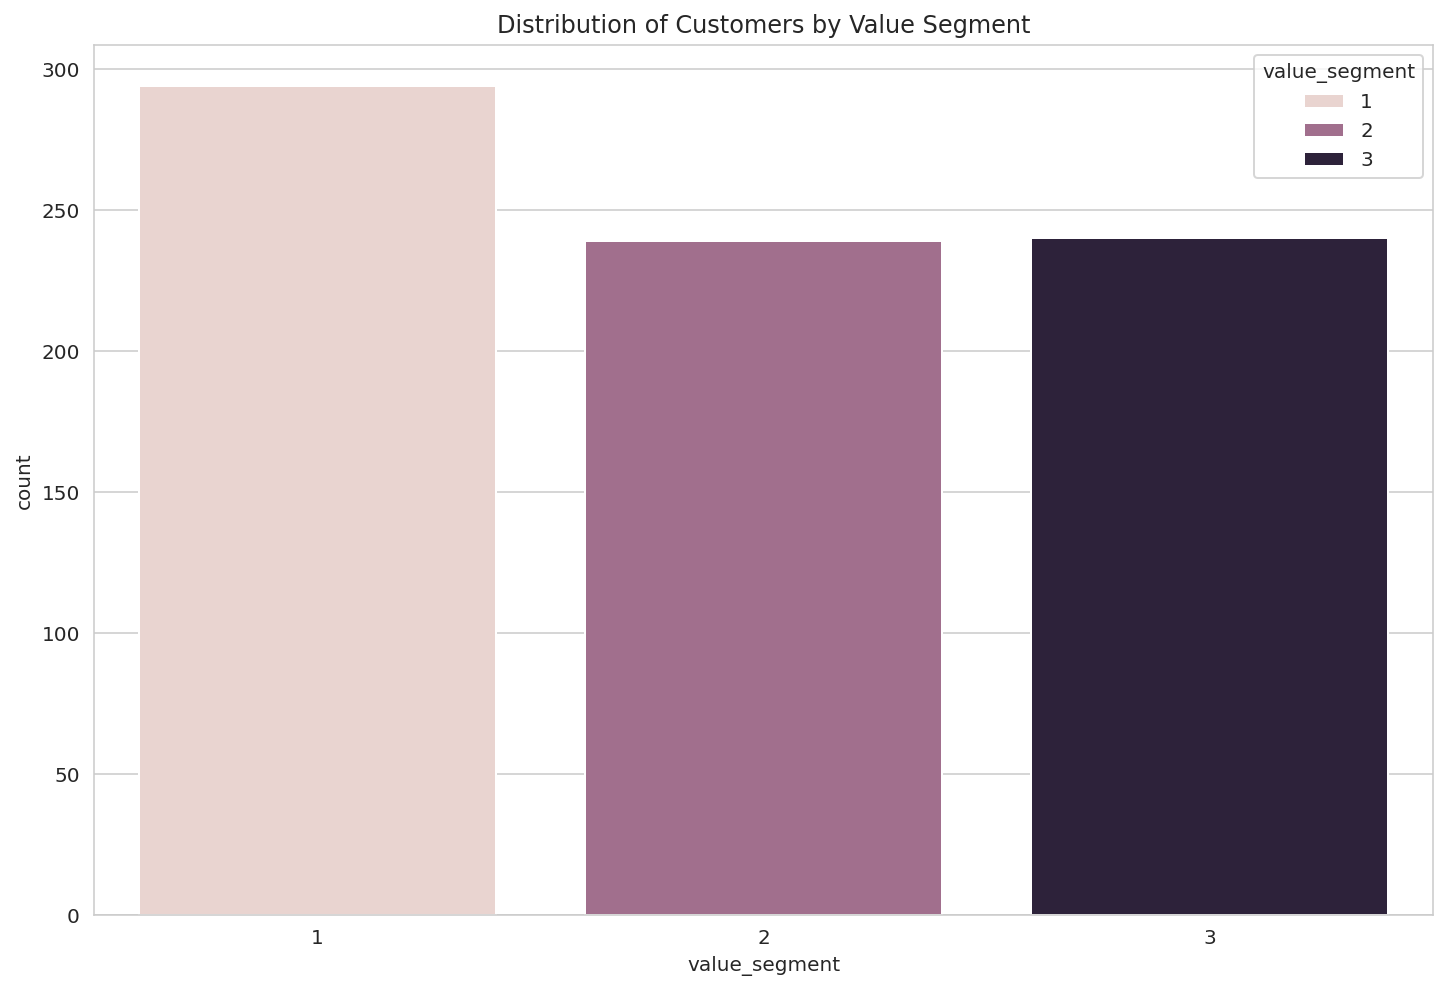

In [43]:
# To check distribution of customers by value_segment, A countplot of number of customers by RFM value segment is use

fig, axes = plt.subplots(figsize= (12,8))
sns.countplot(rfm_df, x="value_segment", hue="value_segment")
axes.set_title("Distribution of Customers by Value Segment")
plt.show()


<u>**Plot Discussion**</u>

Value segment group 1 \(customer with lowest RFM score \) has the highest distribution of customers


In [44]:
# Checking the percent distribution of customers by value_segement, a pie plot of value counts of the value_segment is plotted.

# generating value_counts of value segment 
value_seg_dist = rfm_df["value_segment"].value_counts()
value_seg_dist


value_segment
1    294
3    240
2    239
Name: count, dtype: int64

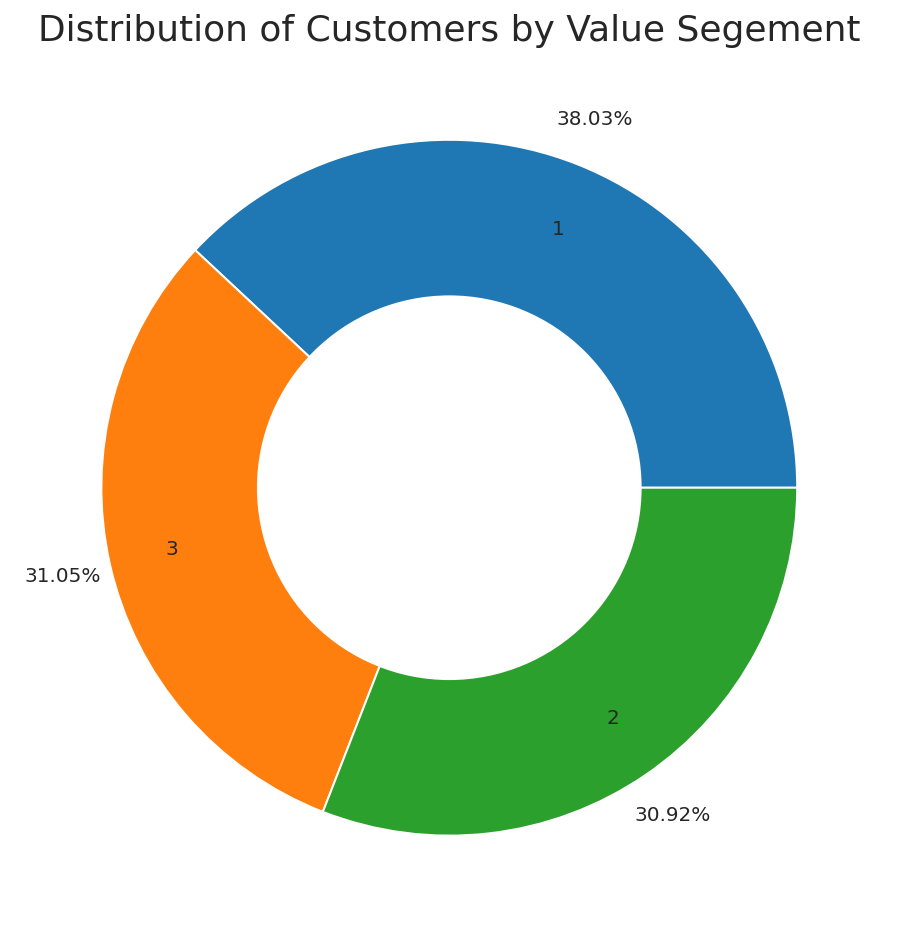

In [45]:
# To plot the pie plot
fig, axes = plt.subplots(figsize =(12,8))
axes.pie(value_seg_dist.values, labels = value_seg_dist.index, autopct= '%1.2f%%', pctdistance=1.14, labeldistance=0.8)
axes.set_title("Distribution of Customers by Value Segement", size=18)


# to draw circle
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()
 
# To add Circle in Pie chart
fig.gca().add_artist(centre_circle)

fig.show()


<u>**Plot Discussion**</u>

38.03% of the customers are in Value Segment 1 \(customer with the lowest RFM score \), followed by Value Segment 3 and 2 with 31.04% and 30.92%



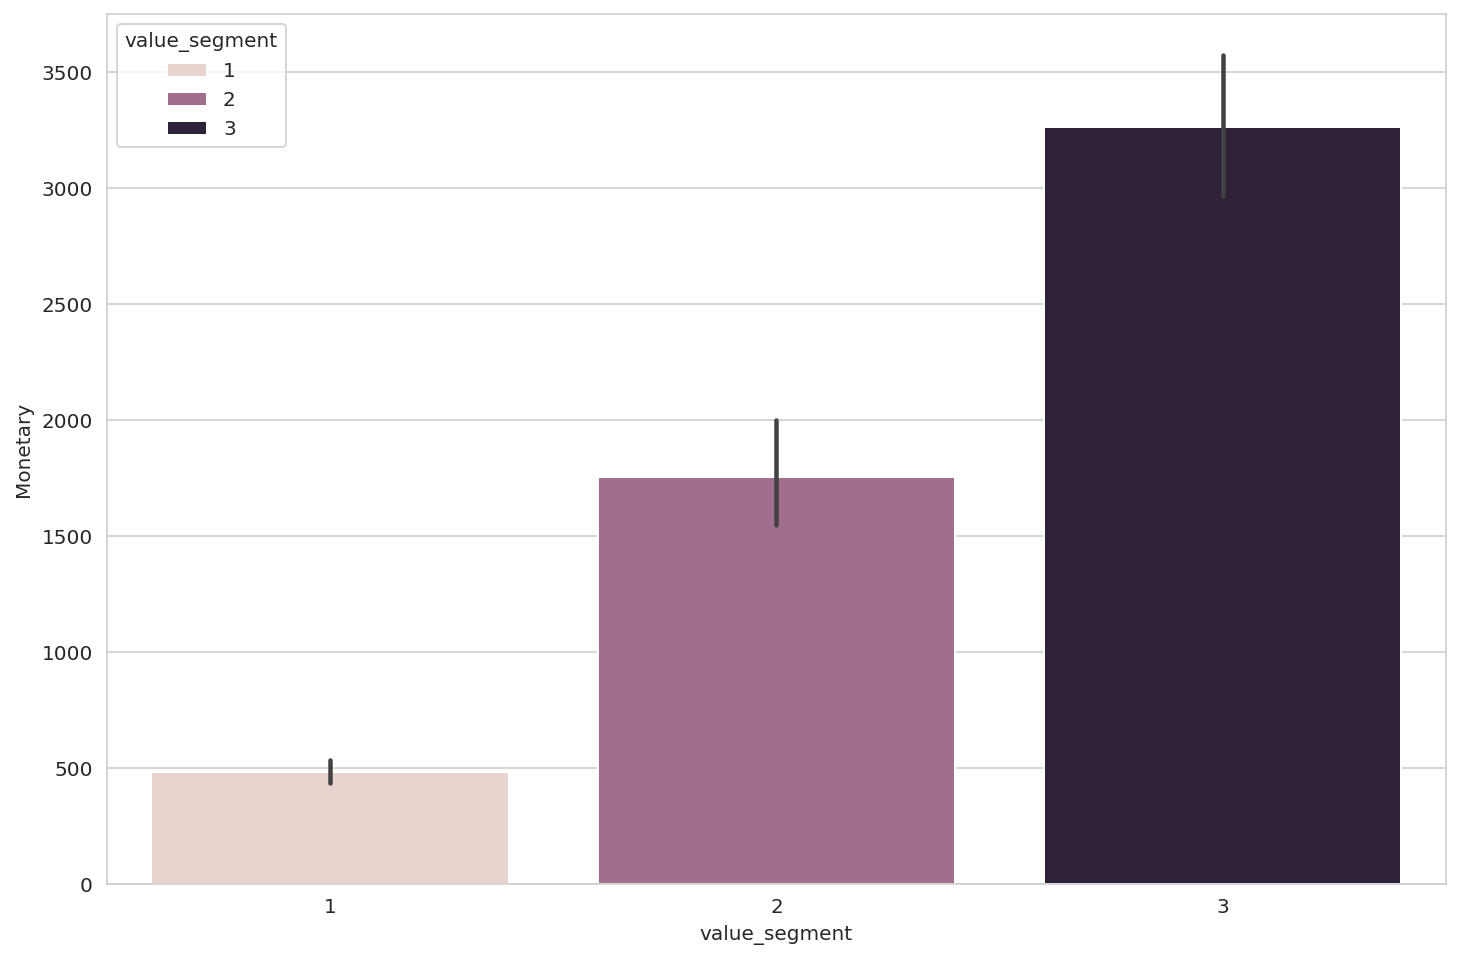

In [46]:
# Checking the average spend per customer by value_segment, Barplot of monetary vs value_segment with estimator=np.mean is plotted
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=rfm_df, y= "Monetary", x="value_segment", estimator=np.mean, hue="value_segment")
axes.set_xlabel("value_segment")
axes.set_ylabel("Monetary")
axes.set_title("Customer Average Spend")
plt.show()


<u>**Plot Discussion**</u>

The average spend per customer is highest at value\_segment group 3, followed by 2 and 1



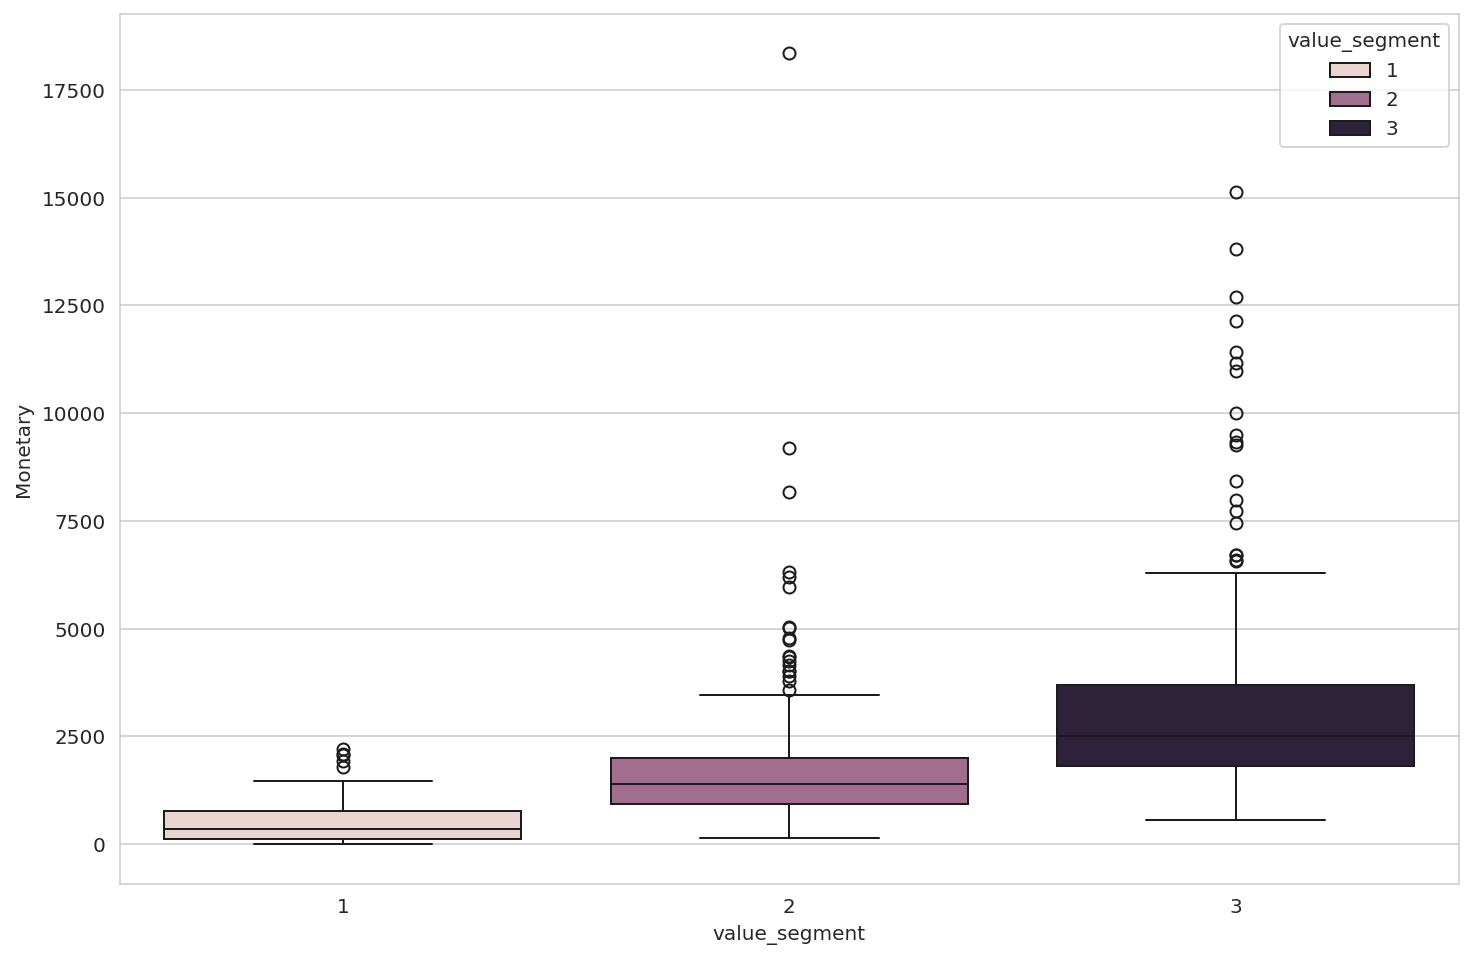

In [47]:
# Checking the distribution of total monetary spend by value_segment, through plotting Boxplot of monetary vs value_segment
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=rfm_df, y= "Monetary", x="value_segment", hue="value_segment")
axes.set_xlabel("value_segment")
axes.set_ylabel("Monetary")
axes.set_title("Customer Total Spend")
plt.show()


<u>**Plot Discussion**</u>

The Total money spent per each value\_segment group is highest in 3, followed by 2 and 1



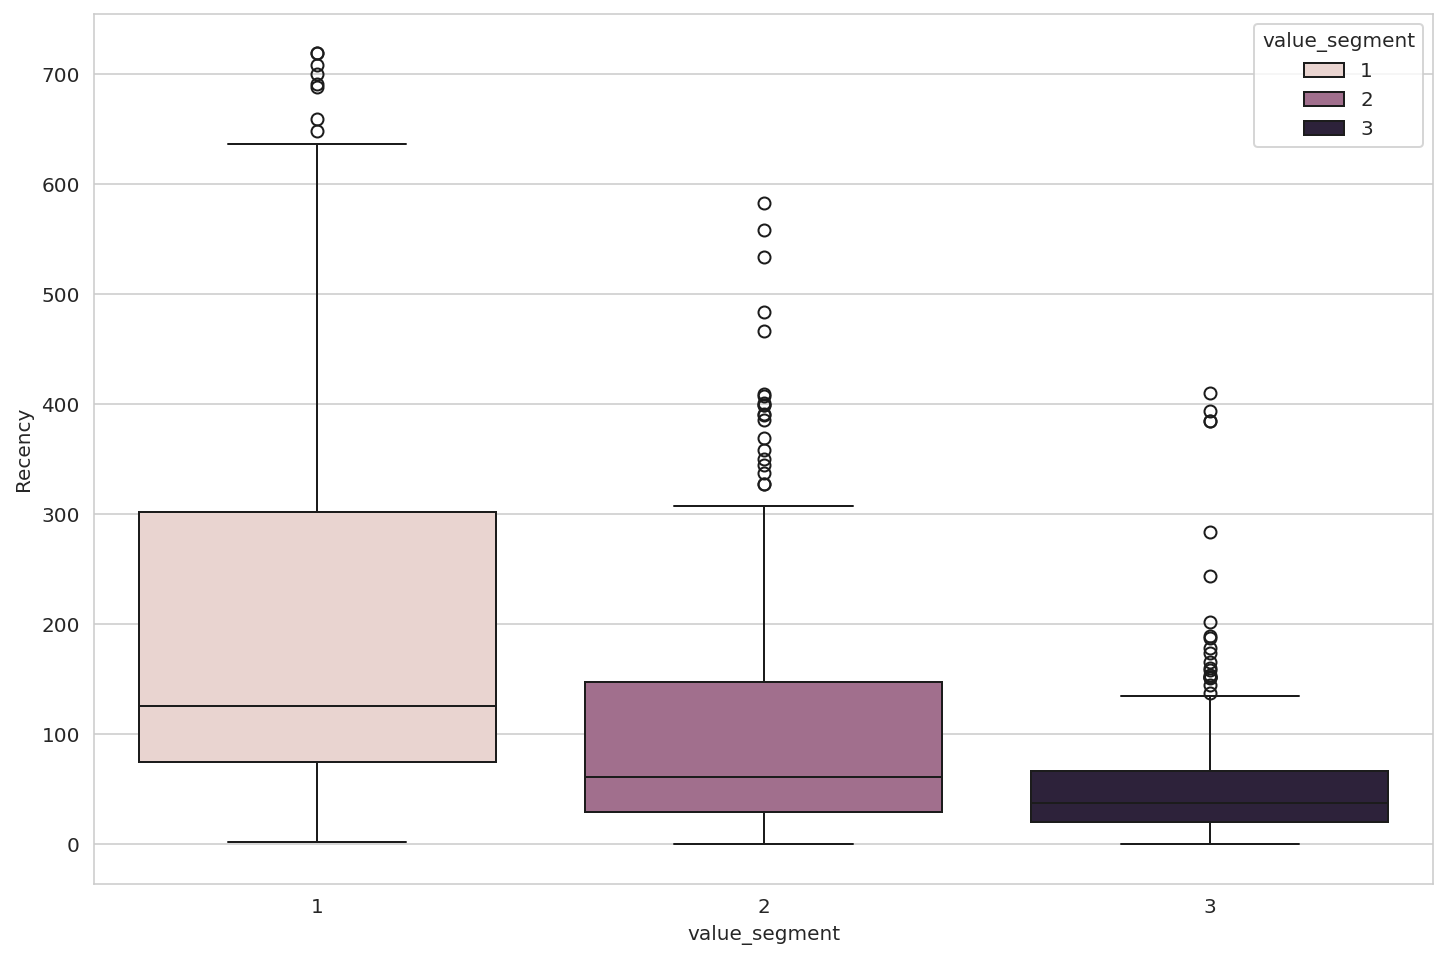

In [48]:
# Check the distribution of recency by value_segment through plotting Boxplot of recency vs value_segment

fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=rfm_df, y= "Recency", x="value_segment", hue="value_segment")
axes.set_xlabel("value_segment")
axes.set_ylabel("Recency")
axes.set_title("Customer Recency_Value")
plt.show()

<u>**Plot Discussion**</u>

The highest recency value is observed among Group 1, followed by 2 and 3.



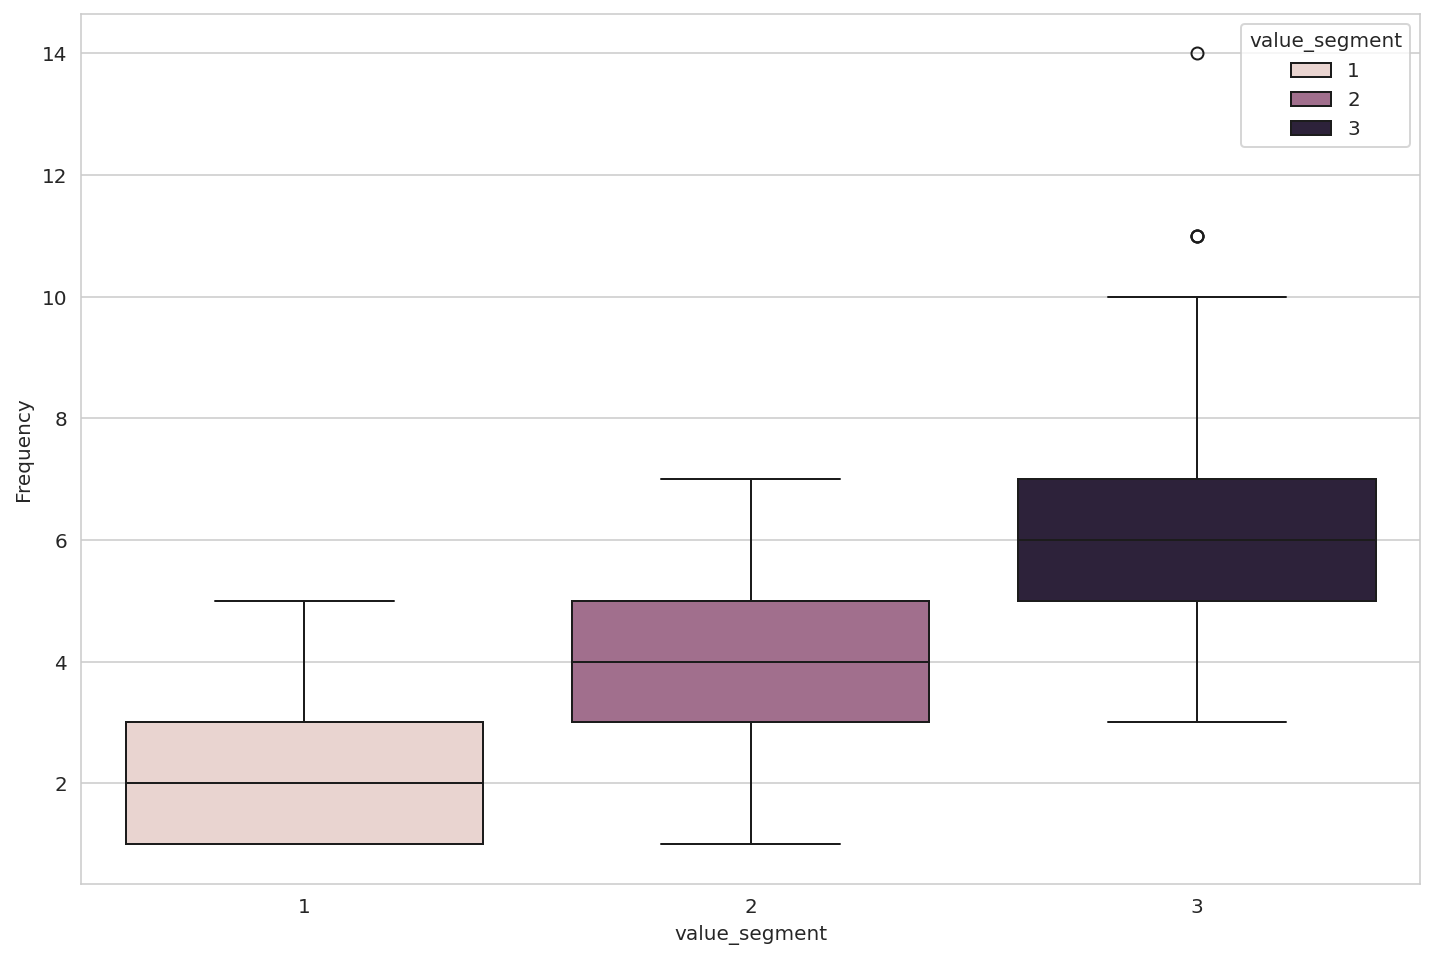

In [49]:
# Checking the distribution of Transaction Frequency by value_segment through creating a boxplot of Transaction Frequency by value_segment

fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=rfm_df, y= "Frequency", x="value_segment", hue="value_segment")
axes.set_xlabel("value_segment")
axes.set_ylabel("Frequency")
axes.set_title("Customer Frequency_Value")
plt.show()


<u>**Plot Discussion**</u>

The highest frequency of the transaction is observed among Group 3, followed by 2 and 1. 



##### **Assign Cash Reward Offers to Customer Segments**



In [50]:
# To replace the rfm value_segment values with meaningful labels, using this dictionary of labels.

segment_name_mapping = {3 : 'Champions', 2 : 'Loyalists', 1 : 'At Risk'}

# using map function
value_label = rfm_df['value_segment'].map(segment_name_mapping)

# creating a column named value_label in rfm_df
rfm_df["value_label"] = value_label
rfm_df

,Recency,Frequency,Monetary,m_score,f_score,r_score,rfm_score,value_segment,value_label
Customer ID,,,,,,,,,
AA-10315,184,2,4780.552,4,1,1,2.2,2,Loyalists
AA-10375,19,4,737.020,2,2,4,2.4,2,Loyalists
AA-10480,259,3,1763.052,3,2,1,2.2,2,Loyalists
AA-10645,55,3,1681.145,3,2,3,2.6,2,Loyalists
AB-10015,415,1,563.940,2,1,1,1.4,1,At Risk
...,...,...,...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,4,3,3.4,3,Champions
YC-21895,4,3,2322.160,4,2,4,3.2,3,Champions
YS-21880,9,5,5340.264,4,3,4,3.6,3,Champions


In [51]:
# Assigning cash reward offers to customers based on their value_segment label, using this dictionary 

reward_offer_map = {'Champions' : 300, 'Loyalists' : 200, 'At Risk' : 50}

# using map function and creating a column named reward_offer in rfm_df
rfm_df["reward_offer"] = rfm_df['value_label'].map(reward_offer_map)
rfm_df

,Recency,Frequency,Monetary,m_score,f_score,r_score,rfm_score,value_segment,value_label,reward_offer
Customer ID,,,,,,,,,,
AA-10315,184,2,4780.552,4,1,1,2.2,2,Loyalists,200
AA-10375,19,4,737.020,2,2,4,2.4,2,Loyalists,200
AA-10480,259,3,1763.052,3,2,1,2.2,2,Loyalists,200
AA-10645,55,3,1681.145,3,2,3,2.6,2,Loyalists,200
AB-10015,415,1,563.940,2,1,1,1.4,1,At Risk,50
...,...,...,...,...,...,...,...,...,...,...
XP-21865,43,7,1265.694,3,4,3,3.4,3,Champions,300
YC-21895,4,3,2322.160,4,2,4,3.2,3,Champions,300
YS-21880,9,5,5340.264,4,3,4,3.6,3,Champions,300


In [52]:
# Saving the final rfm_df dataframe to file as 'RFM_Final_Output.xlsx'

rfm_df.to_excel("RFM_Final_Output.xlsx")


###### **Adding RFM Variables to Original Dataset for more Insights**

In [53]:
# Add the RFM Value Segment labels to the obs_df transaction data that was originally used for performing the RFM analysis. 

obs_value_label = obs_df["Customer ID"].map(rfm_df["value_label"])

# Or using this line of code 
# obs_value_label = obs_df["Customer ID"].apply(lambda x: rfm_df.loc[x, "value_label"])

# creating a column named Value Seg Label in obs_df  
obs_df["Value Seg Label"] = obs_value_label
obs_df



/tmp/ipykernel_1482/2512926915.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["Value Seg Label"] = obs_value_label


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Value Seg Label
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,At Risk
2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,At Risk
3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,Loyalists
13,CA-2017-114412,2017-04-15,4/20/2017,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,Loyalists
14,CA-2016-161389,2016-12-05,12/10/2016,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,...,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-163629,2017-11-17,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,...,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470,Loyalists
9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,Champions
9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,Champions


In [54]:
# Check the distribution of number of customers in each rfm value segment

obs_df["Value Seg Label"].value_counts()

Value Seg Label
Champions    2966
Loyalists    1782
At Risk      1162
Name: count, dtype: int64

### **Product Category Analysis**



In [55]:
# Create a new column called 'unit_cost' containing the ratio of Sales to quantity for each transaction.

obs_df["unit_cost"] = obs_df["Sales"]/obs_df["Quantity"]
obs_df

/tmp/ipykernel_1482/748840946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["unit_cost"] = obs_df["Sales"]/obs_df["Quantity"]


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Value Seg Label,unit_cost
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,At Risk,130.980
2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,At Risk,243.980
3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,Loyalists,7.310
13,CA-2017-114412,2017-04-15,4/20/2017,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,Loyalists,5.184
14,CA-2016-161389,2016-12-05,12/10/2016,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,...,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,At Risk,135.992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-163629,2017-11-17,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,...,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470,Loyalists,41.220
9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,Champions,45.980
9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,Champions,129.288


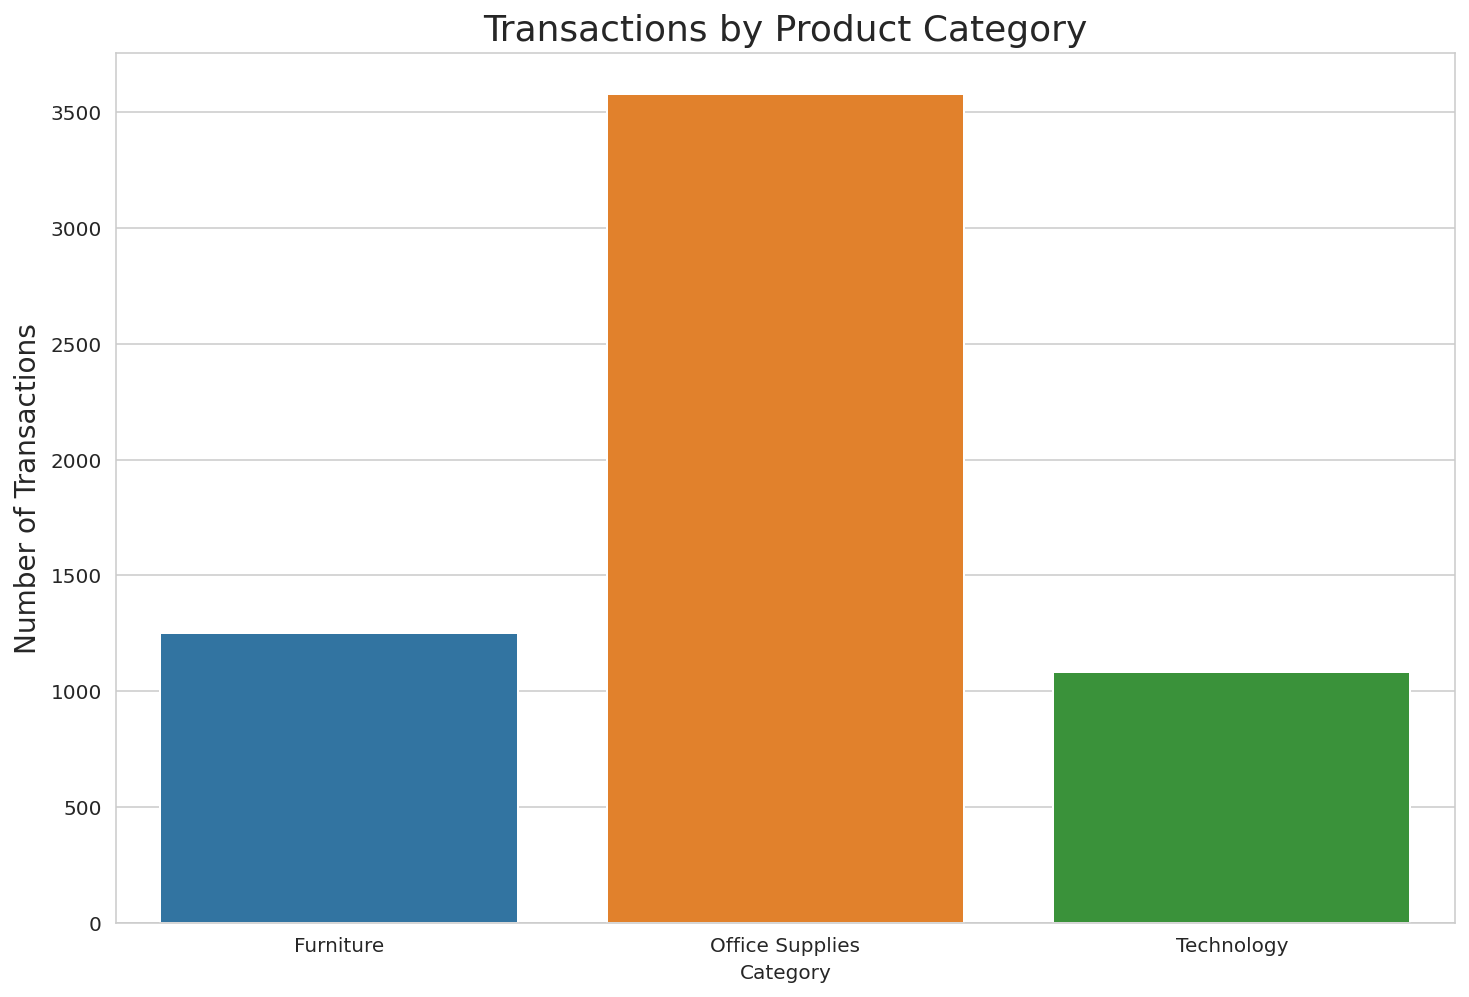

In [56]:
# Check the number of transactions by Product Category using a countplot of the Category
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data= obs_df, x= "Category", hue="Category")
axes.set_ylabel("Number of Transactions", size= 14)
axes.set_title("Transactions by Product Category", size=18)
plt.show()

<u>**Plot Discussion** </u>

Office Supplies are the product category with the highest number of transactions. 

The high transaction number might be due to their size, low average cost, and the fact that they are consumable products. 


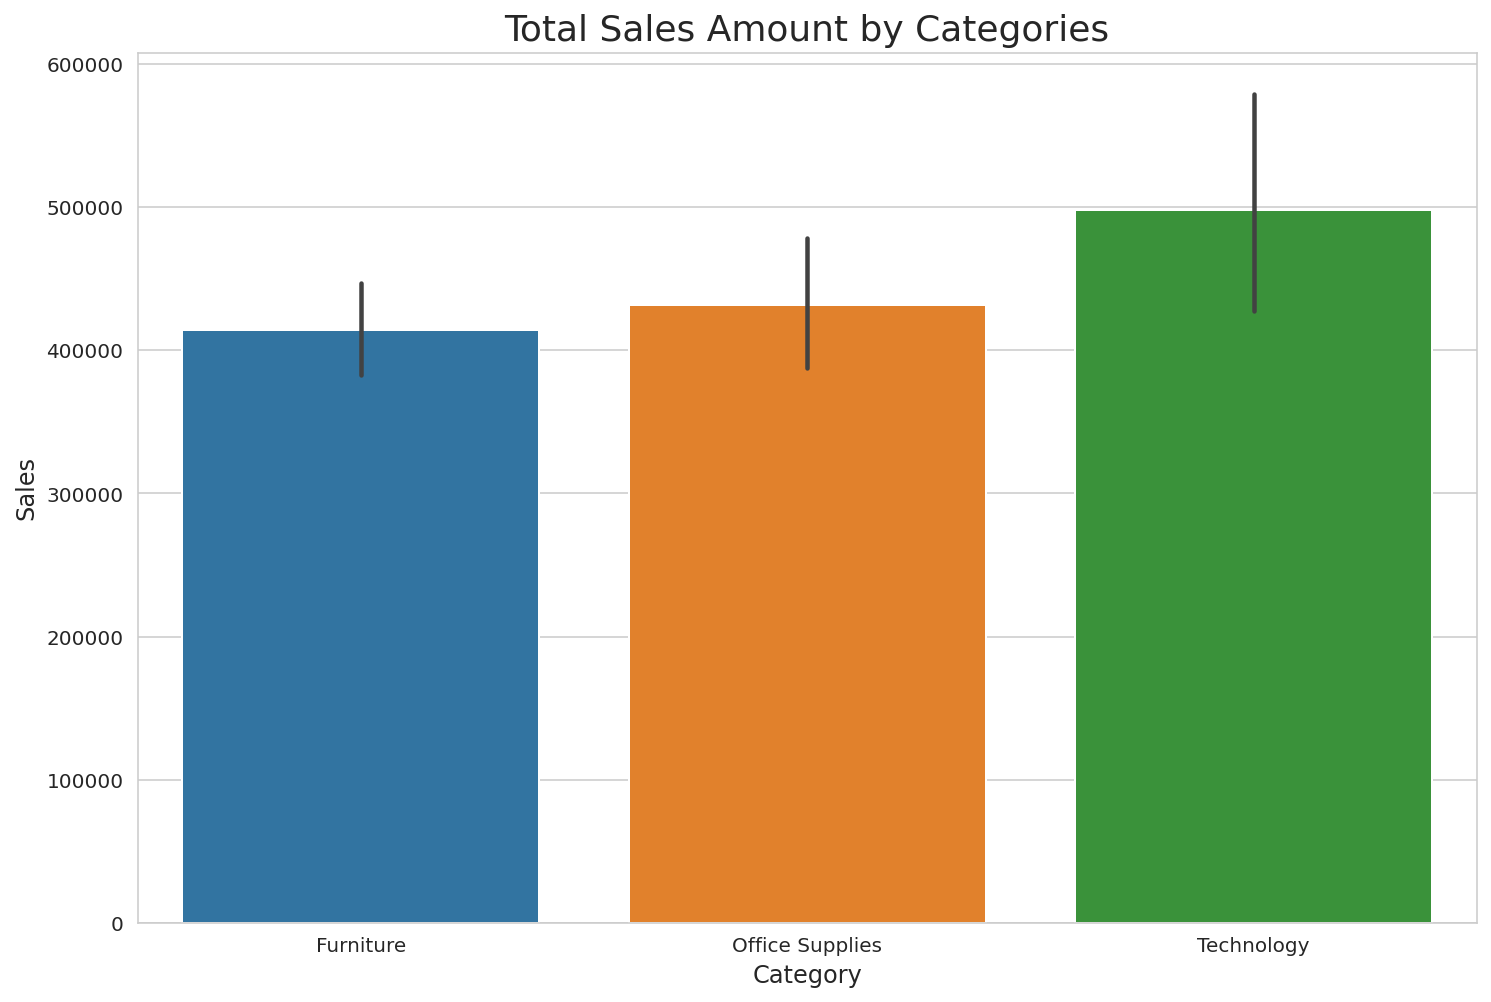

In [57]:
# Check which Product Category has the largest total amount of Sales using a barplot of Sales versus Category
fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Category", y= "Sales", estimator=np.sum, hue="Category")
axes.set_xlabel("Category", size=12)
axes.set_ylabel("Sales", size=12)
axes.set_title("Total Sales Amount by Categories", size=18)
plt.show()



<u>**Plot Discussion**</u><u> </u>

Technology is the product category with the highest amount of sales. 

The high sales amount might be due to their wide use in everyday activities, high average cost, and technologically inclined consumers of all ages and statuses. 


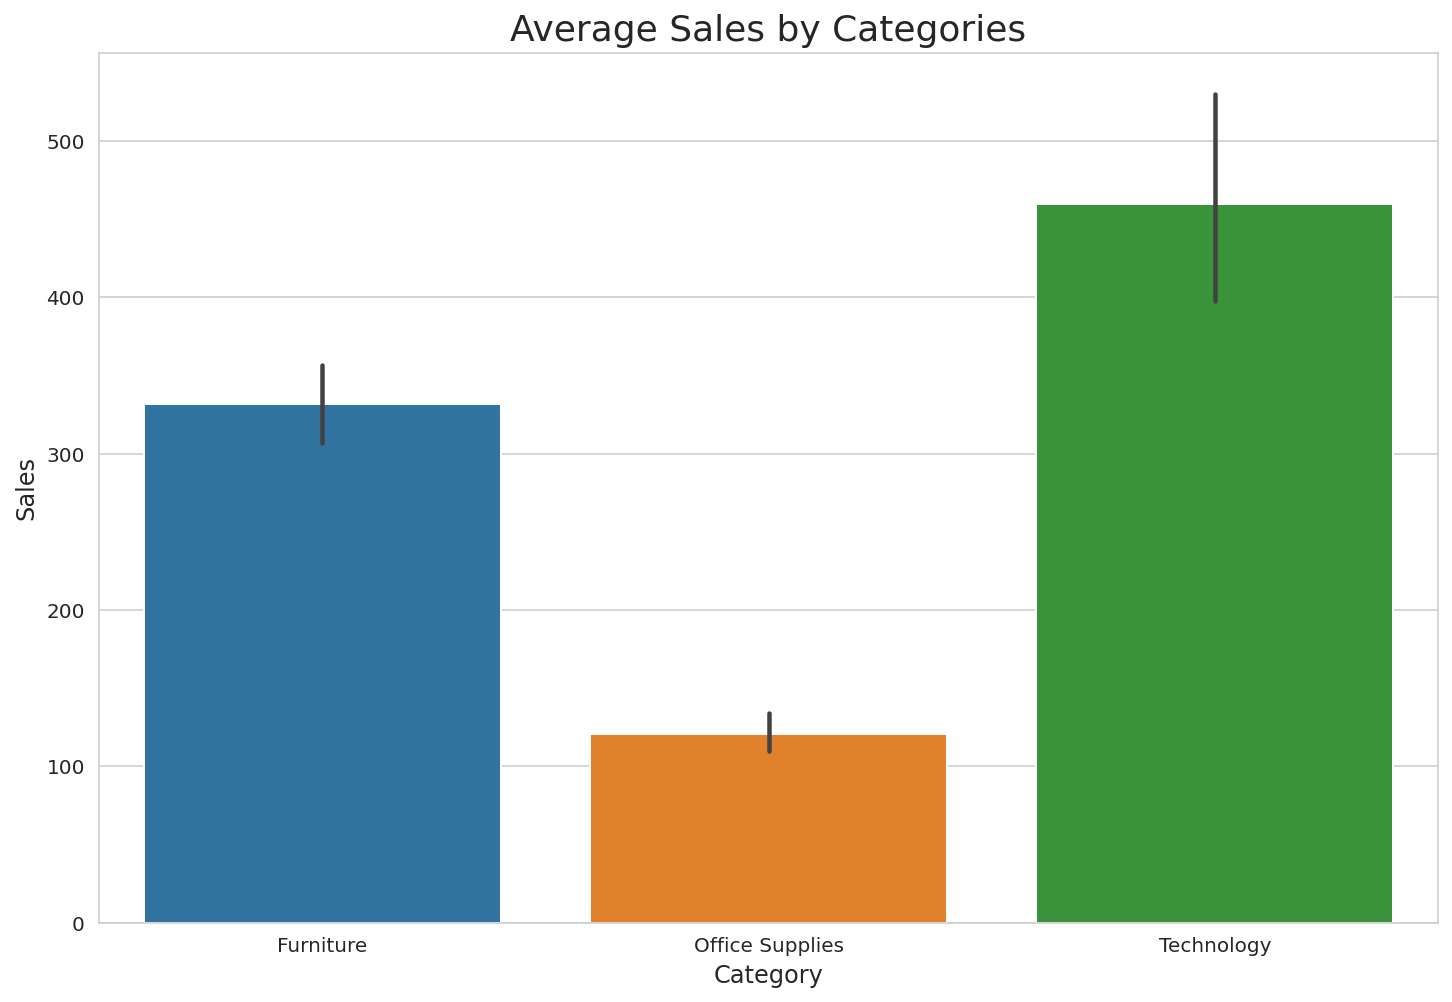

In [58]:
# Check which Product Category has the highest average Sales using a barplot of Sales versus Category, with estimator=np.mean
fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Category", y= "Sales", estimator=np.mean, hue="Category")
axes.set_xlabel("Category", size=12)
axes.set_ylabel("Sales", size=12)
axes.set_title("Average Sales by Categories", size=18)
plt.show()



<u>**Plot Discussion**</u><u> </u>

Technology is the product category with the highest average sales, followed by furniture. 

The high average sales of this category show that people spend more on technology per transaction at the store. This might be due to their wide use in everyday activities and high average cost.


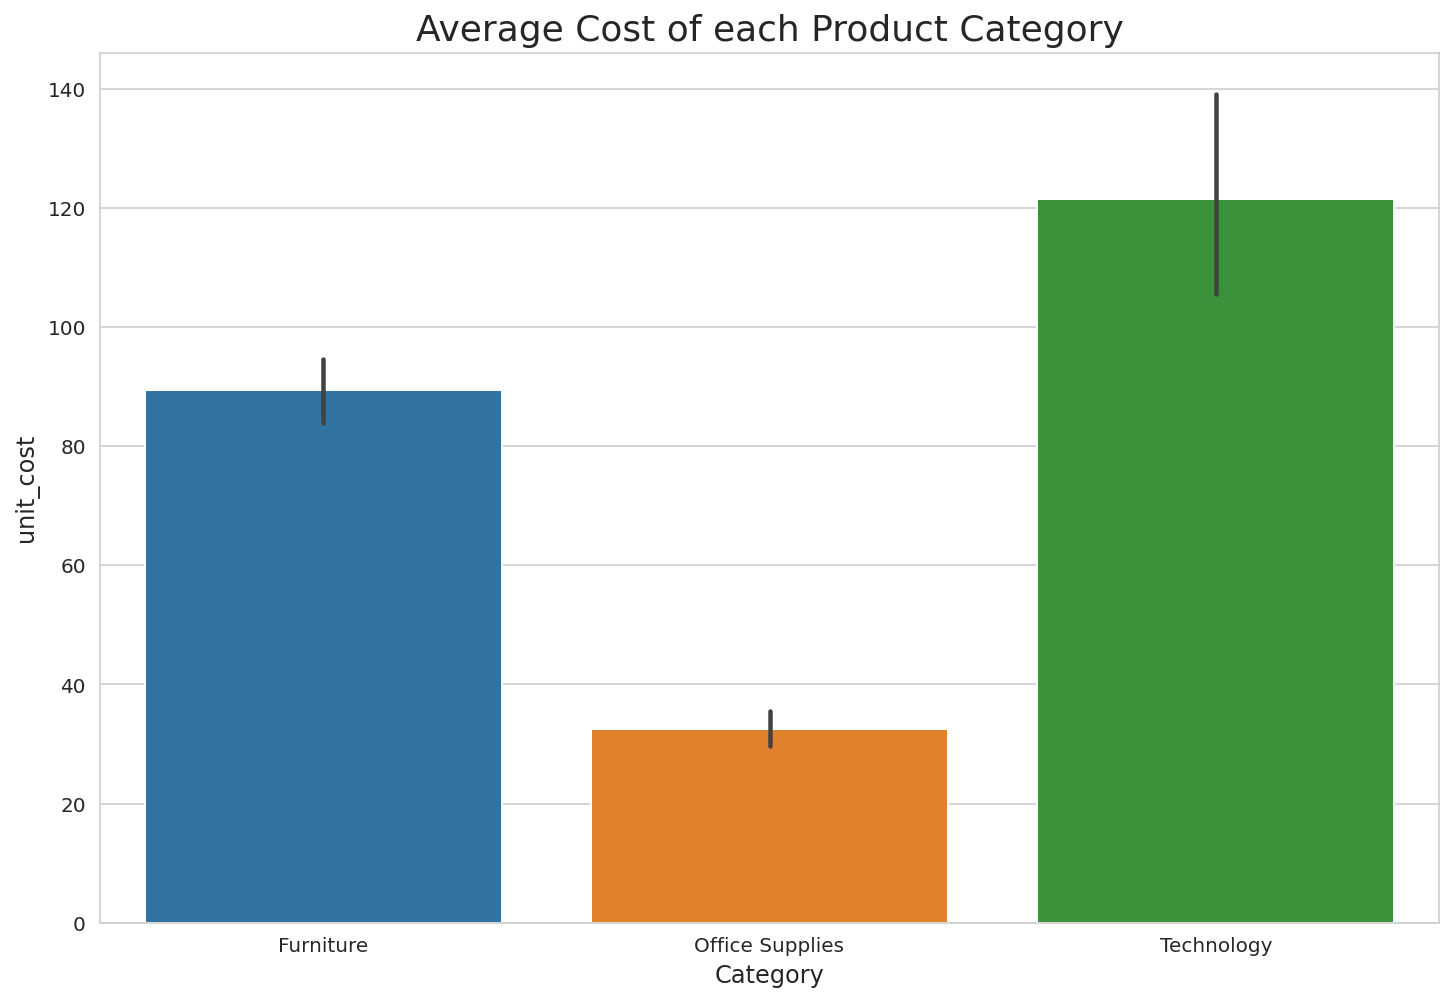

In [59]:
# Check the average cost of each Product Category Item using a barplot of unit_cost versus Category

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Category", y= "unit_cost", estimator=np.mean, hue="Category")
axes.set_xlabel("Category", size=12)
axes.set_ylabel("unit_cost", size=12)
axes.set_title("Average Cost of each Product Category", size=18)
plt.show()



<u>**Plot Discussion**</u><u> </u>

Technology is the product category with the highest average cost and Office supplies with the lowest.



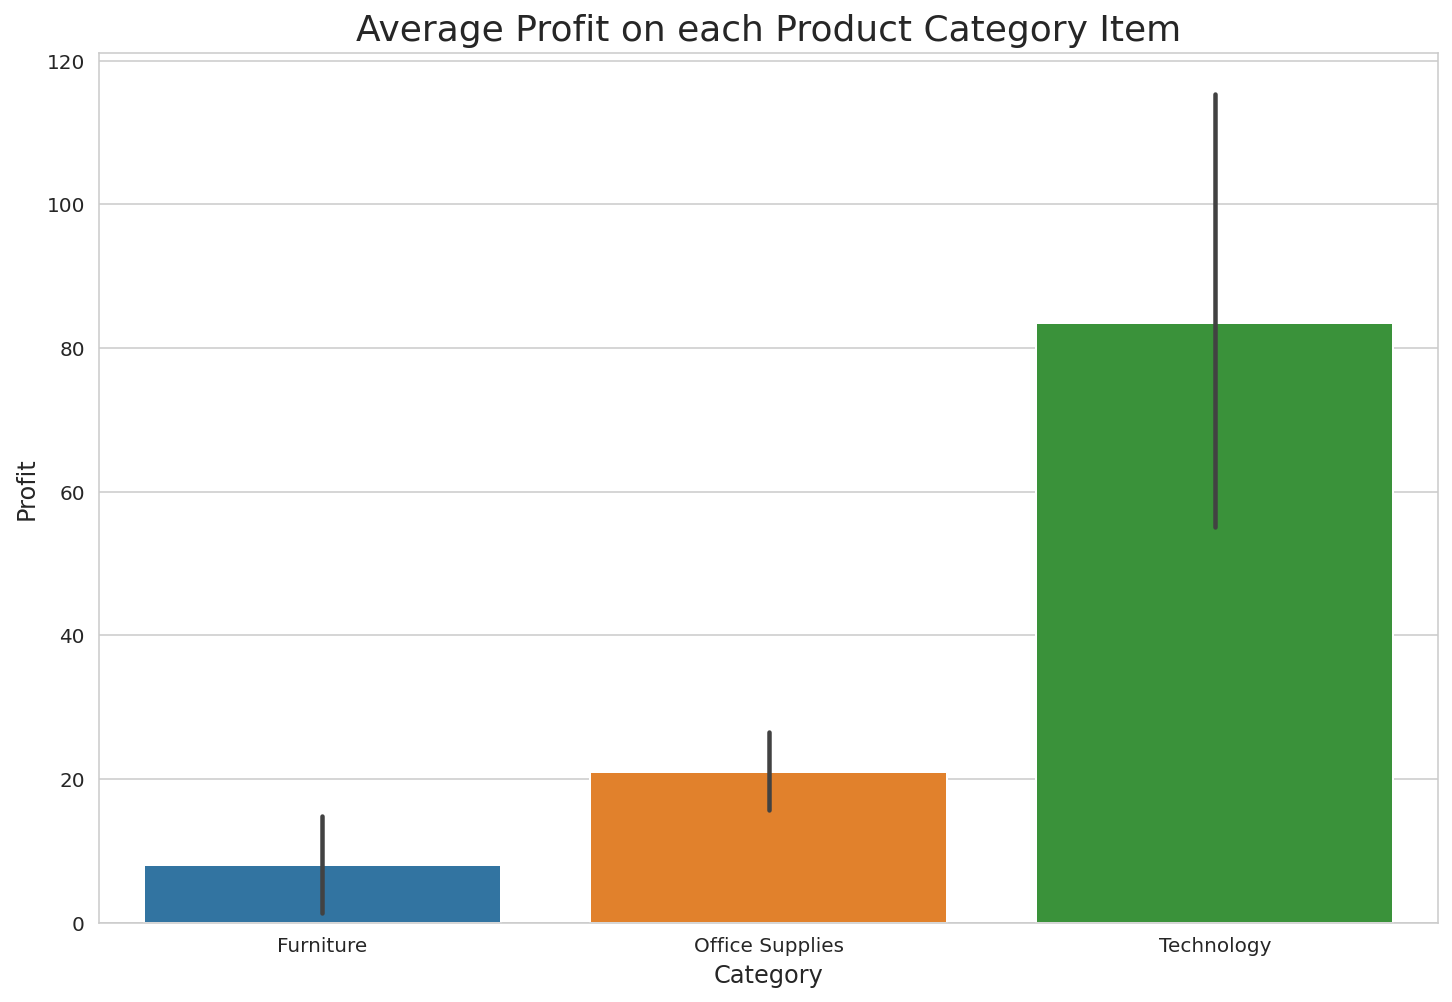

In [60]:
# Check which Product Category is the most profitable using a barplot of profit versus Category, with estimator=np.mean

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Category", y= "Profit", estimator=np.mean, hue="Category")
axes.set_xlabel("Category", size=12)
axes.set_ylabel("Profit", size=12)
axes.set_title("Average Profit on each Product Category Item", size=18)
plt.show()


<u>**Plot Discussion**</u><u> </u>

Technology is the most profitable product category, and furniture is the least


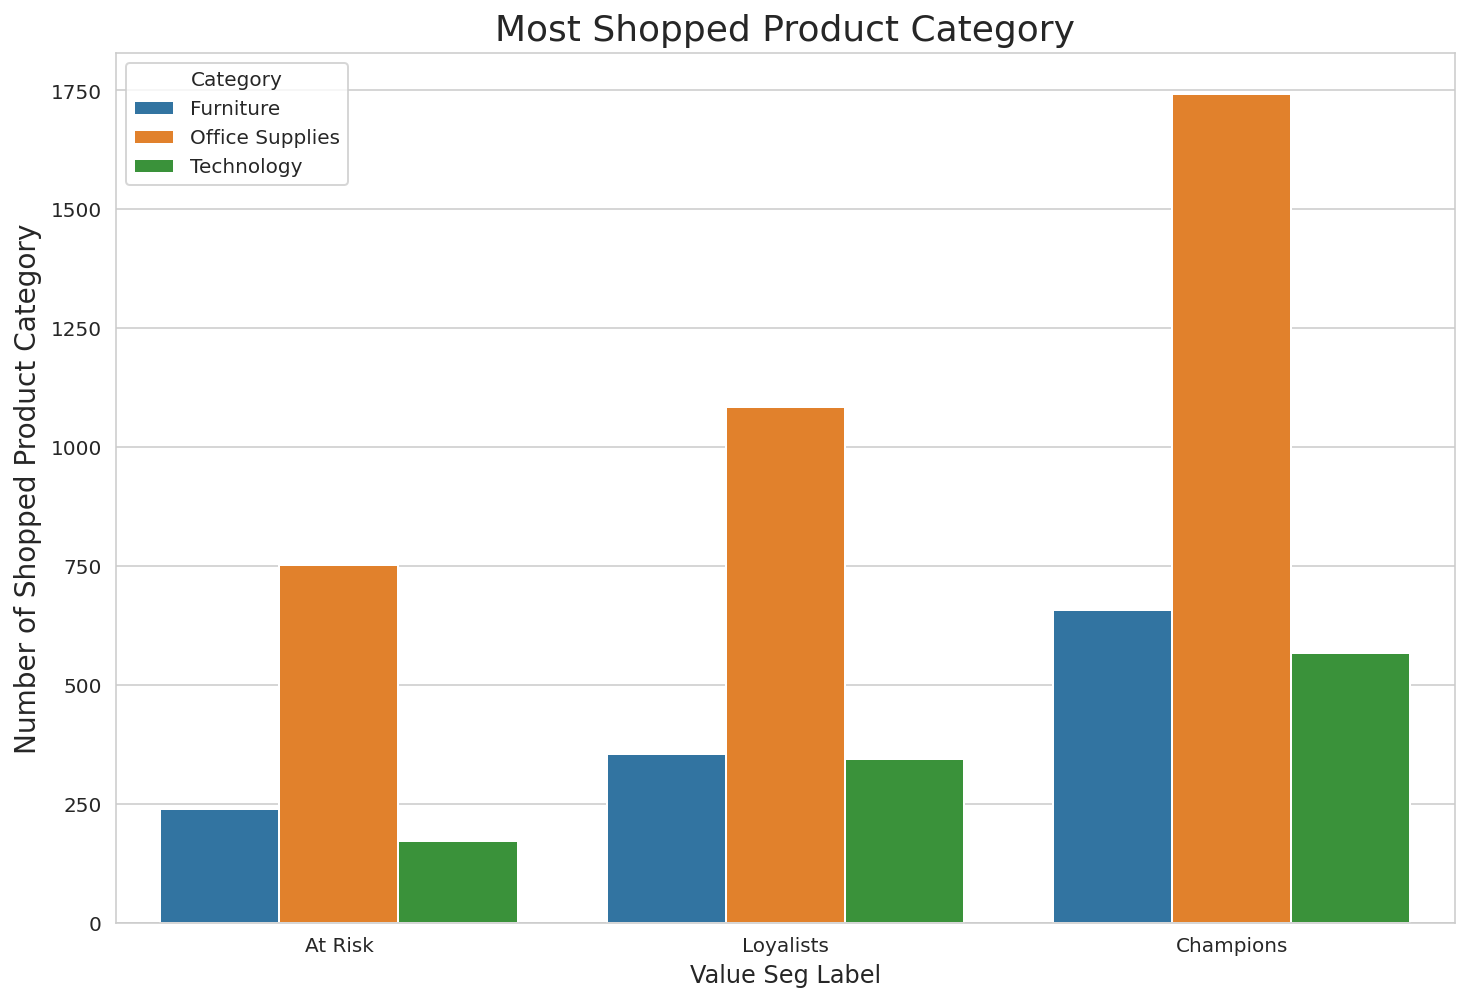

In [61]:
# Check the most shopped Product Category by rfm Value Segment using a countplot of value_segment with hue='Category'
fig, axes=plt.subplots(figsize=(12,8))
sns.countplot(data=obs_df, x= "Value Seg Label", hue= "Category")
axes.set_xlabel("Value Seg Label", fontsize=12)
axes.set_ylabel("Number of Shopped Product Category", size= 14)
axes.set_title("Most Shopped Product Category", size=18)
plt.show()

<u>**Plot Discussion**</u><u> </u>

Office supplies is most shopped product category across all customer value segment


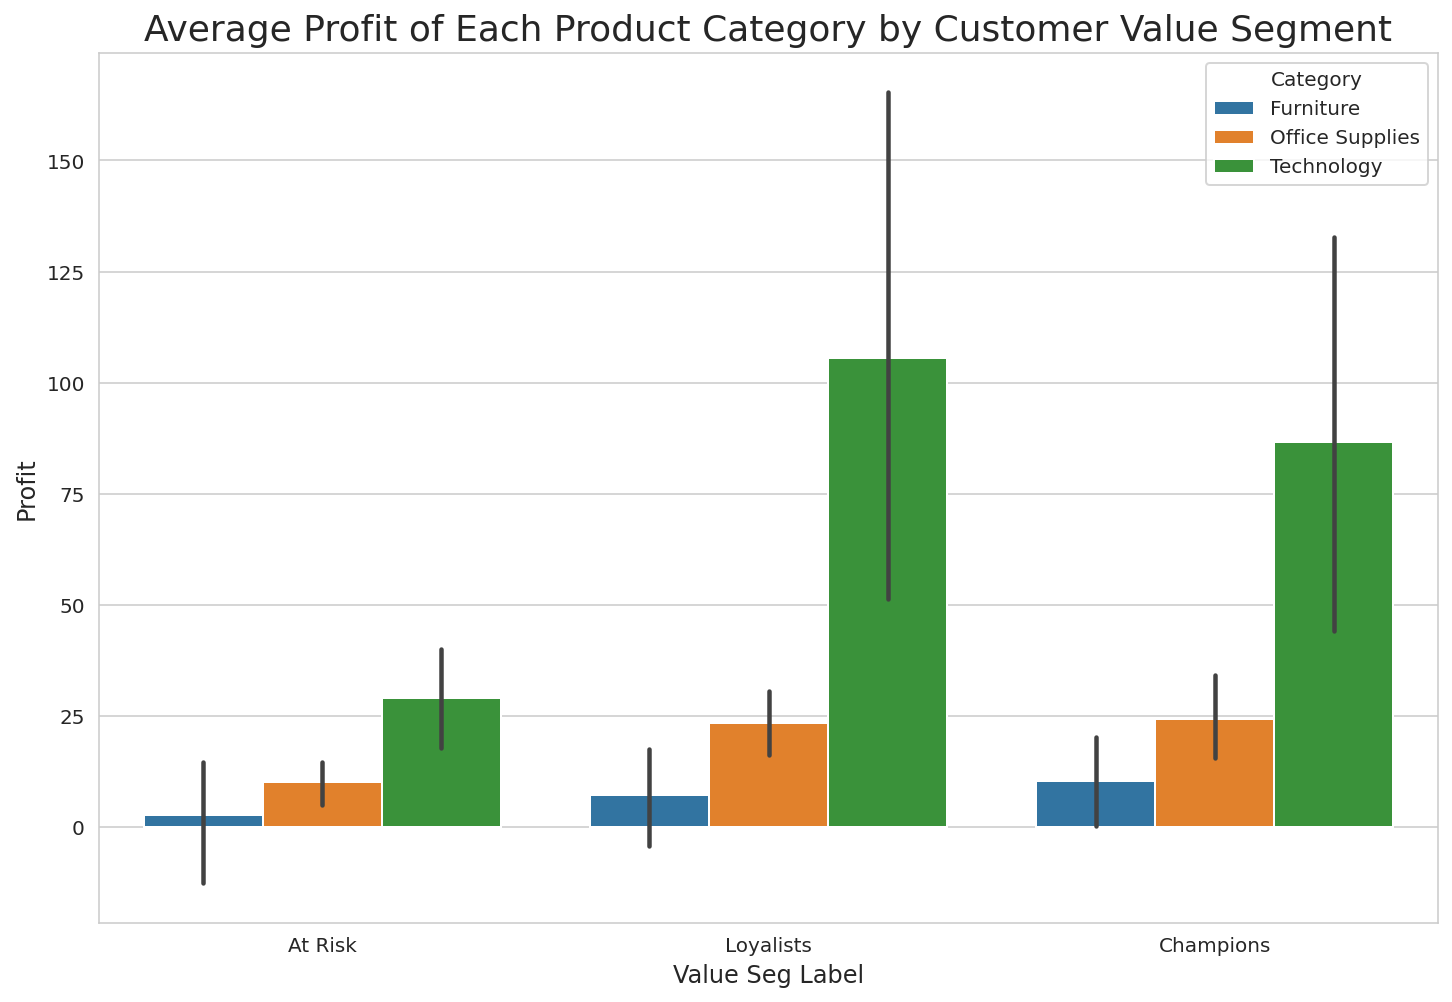

In [62]:
# Check the average profit by rfm value segment in each product category using a barplot of profit vs. value_segment with estimator=np.mean and hue='Category'


fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Value Seg Label", y= "Profit", estimator=np.mean, hue="Category")
axes.set_xlabel("Value Seg Label", size=12)
axes.set_ylabel("Profit", size=12)
axes.set_title("Average Profit of Each Product Category by Customer Value Segment", size=18)
plt.show()


<u>**Plot Discussion**</u><u> </u>

Technology is the most profitable product category on average across all customer value segments, with a very widespread or high standard deviation away from the profit mean value among the Loyalists and Champions


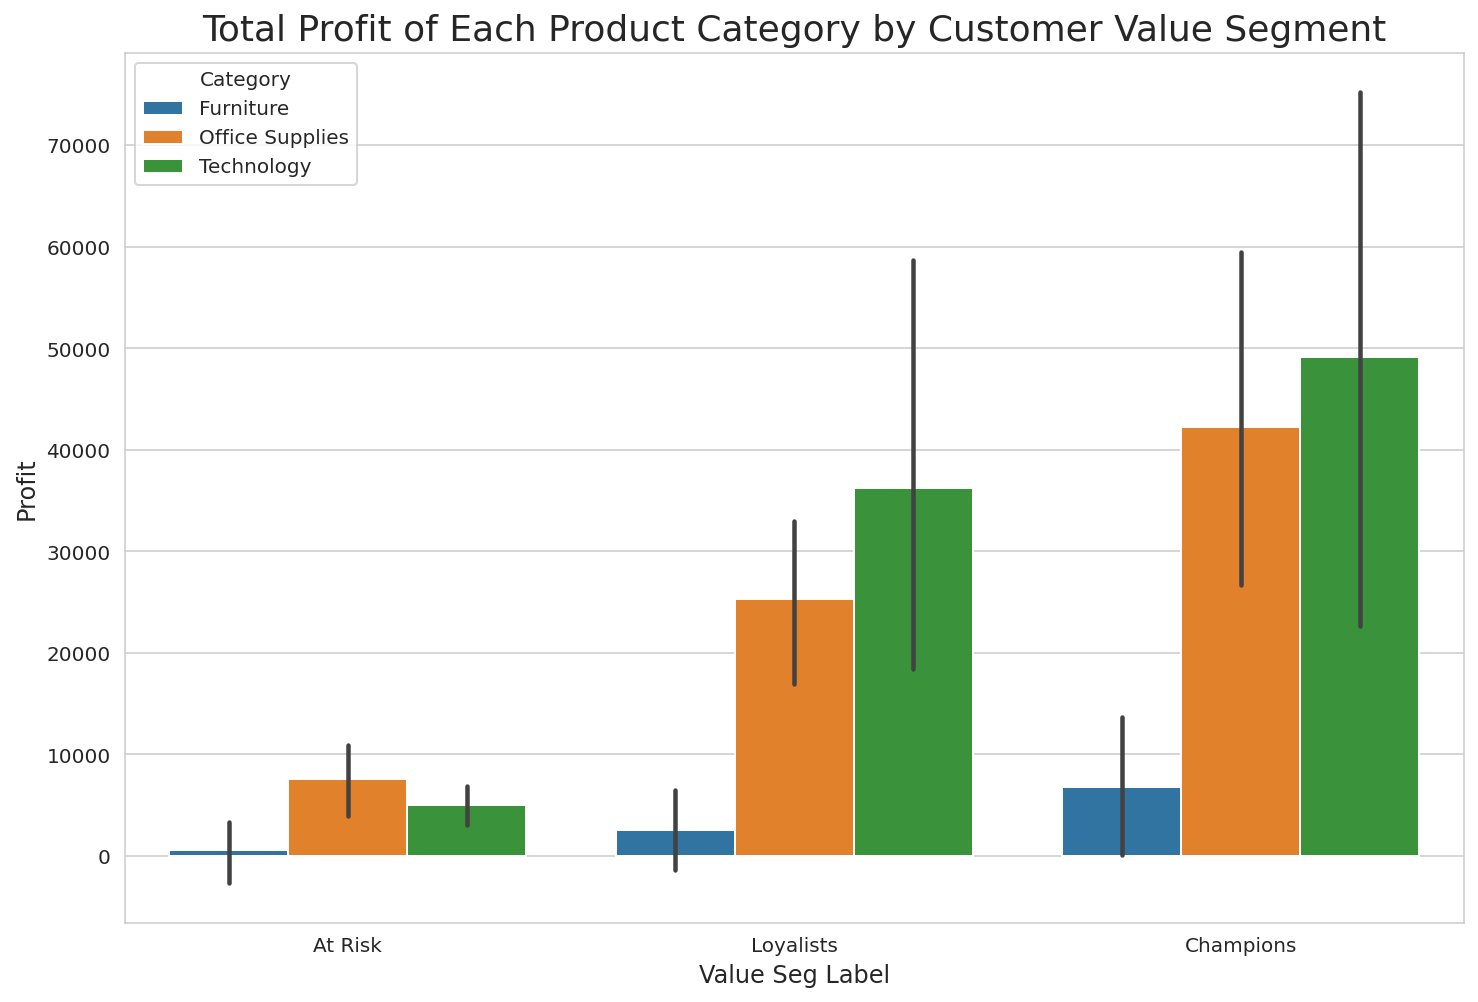

In [63]:
# Check the total profit by rfm value segment in each product category using a barplot of profit vs. value_segment with estimator=np.sum and hue='Category'

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Value Seg Label", y= "Profit", estimator=np.sum, hue="Category")
axes.set_xlabel("Value Seg Label", size=12)
axes.set_ylabel("Profit", size=12)
axes.set_title("Total Profit of Each Product Category by Customer Value Segment", size=18)
plt.show()

<u>**Plot Discussion**</u><u> </u>

Technology is the most profitable product category in total across all customer value segments except in "Ät Risk Segment" where office supplies lead.

Technology gave a high standard deviation compared to office supplies in Loyalists and Champions



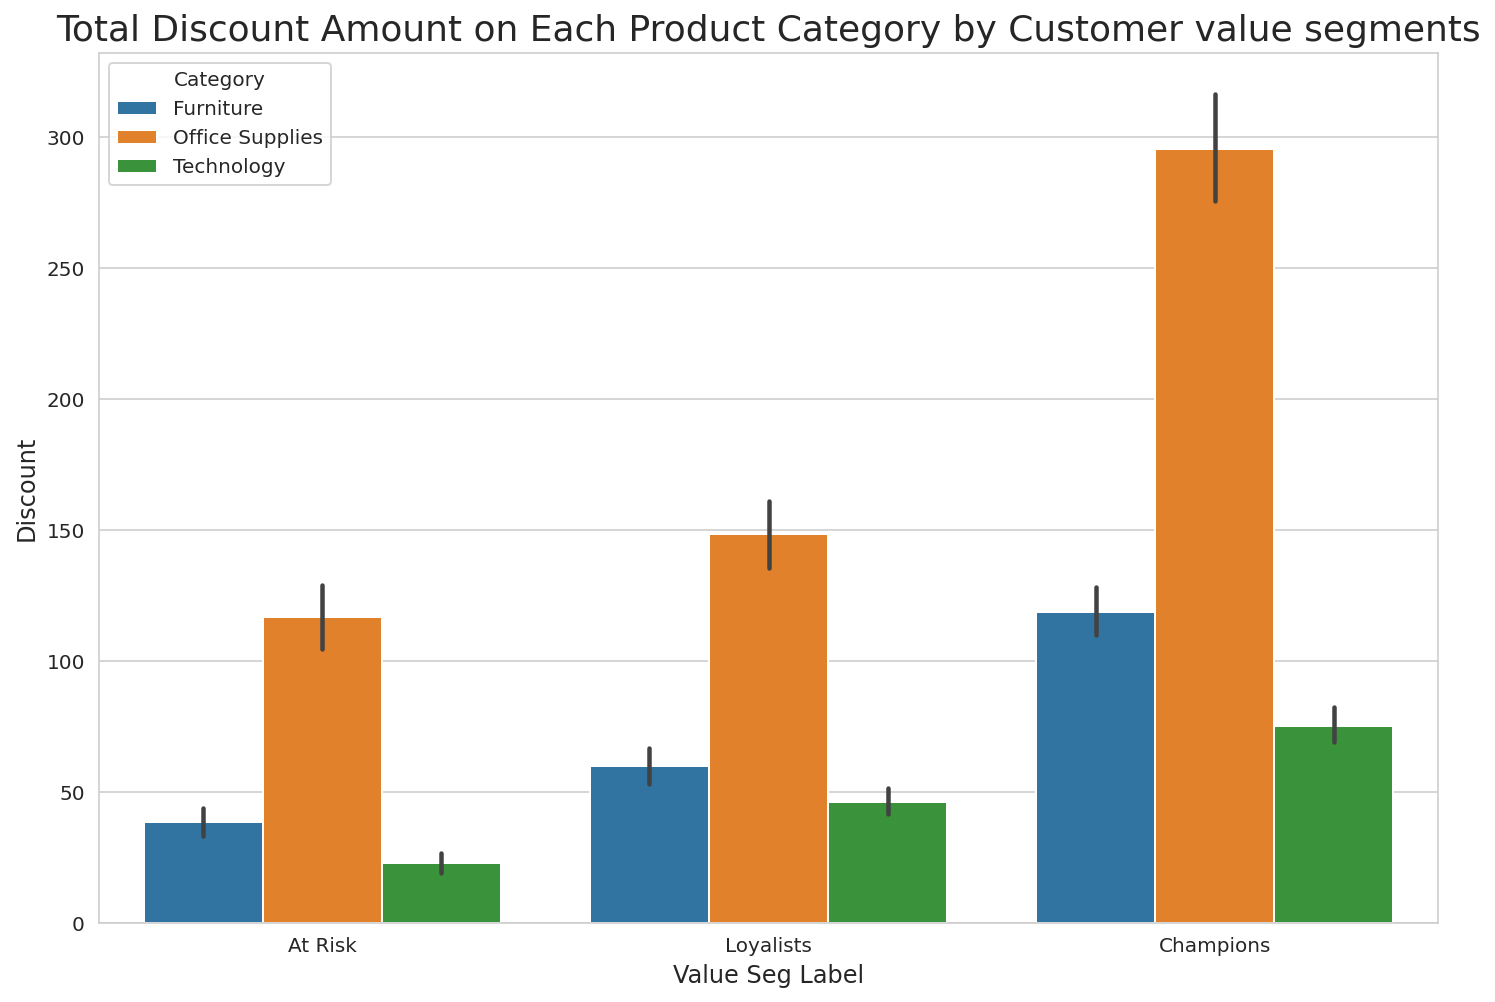

In [64]:
# Check the total amount of discounts by rfm value segment in each product category using a barplot of discount vs. value_segment with estimator=np.sum and hue='Category'

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Value Seg Label", y= "Discount", estimator=np.sum, hue="Category")
axes.set_xlabel("Value Seg Label", size=12)
axes.set_ylabel("Discount", size=12)
axes.set_title("Total Discount Amount on Each Product Category by Customer value segments", size=18)
plt.show()

<u>**Plot Discussion**</u><u> </u>

Office supplies are the most discounted product category across all customer value segments. 

While Technology is the least discounted product category.


### Ship Mode Analysis

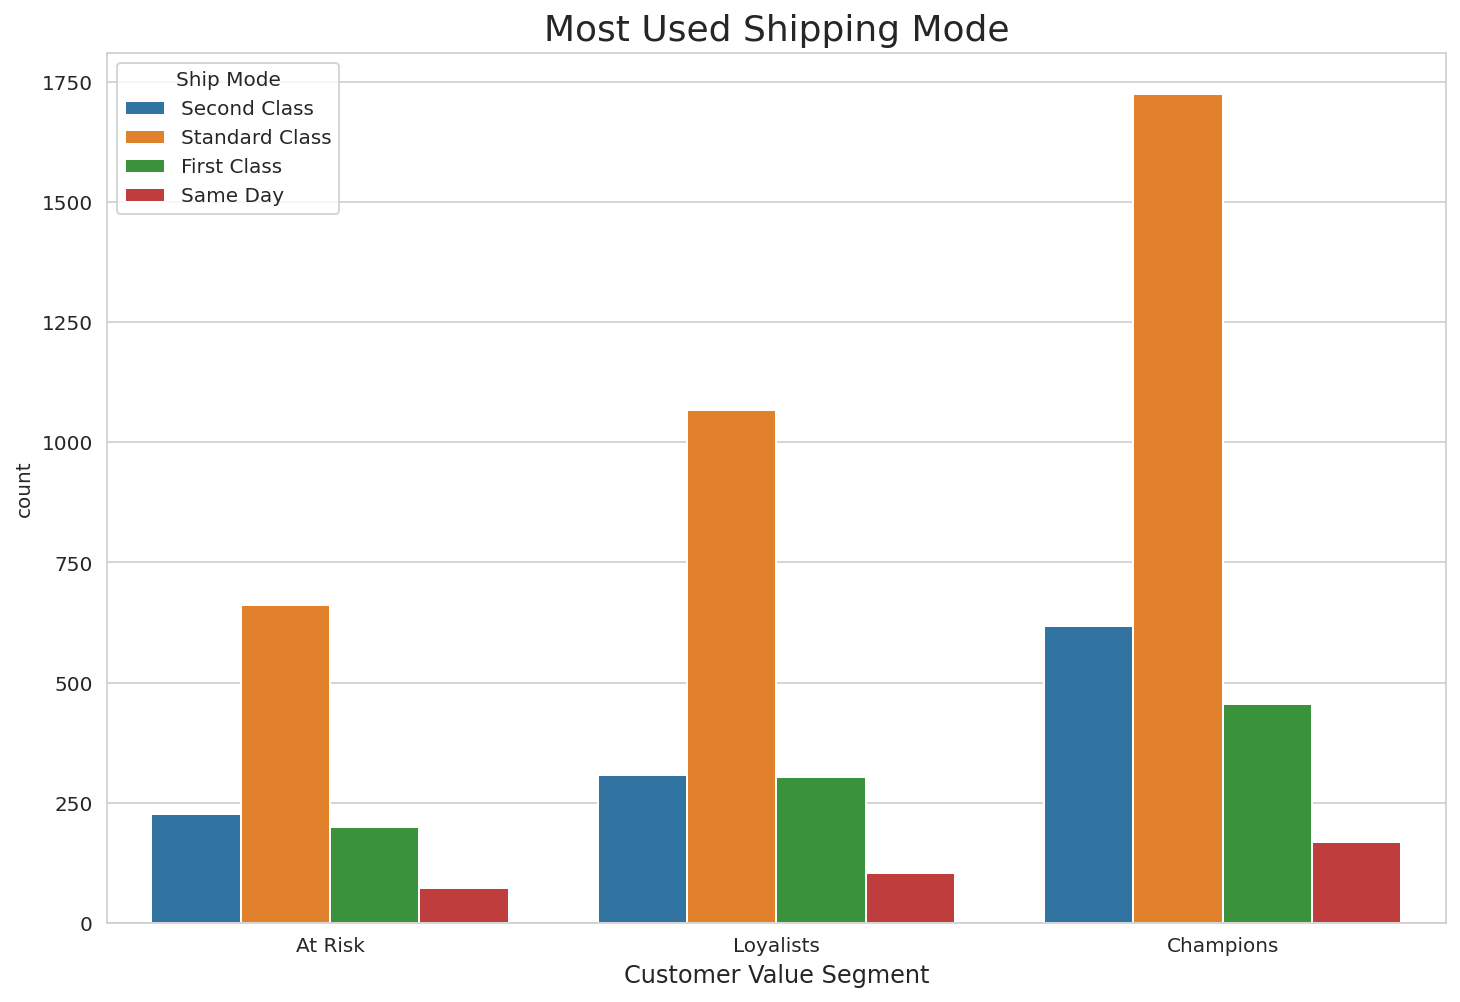

In [65]:
# Check which shipping mode is the most frequently used across rfm value segments using a countplot of value_segment with hue='Ship Mode'

fig, axes=plt.subplots(figsize=(12,8))
sns.countplot(data=obs_df, x= "Value Seg Label", hue= "Ship Mode")
axes.set_xlabel("Customer Value Segment", size=12)
axes.set_title("Most Used Shipping Mode", size=18)
plt.show()


<u>**Plot Discussion**</u>

Standard Class is the most used shipping mode across all customer value segments.



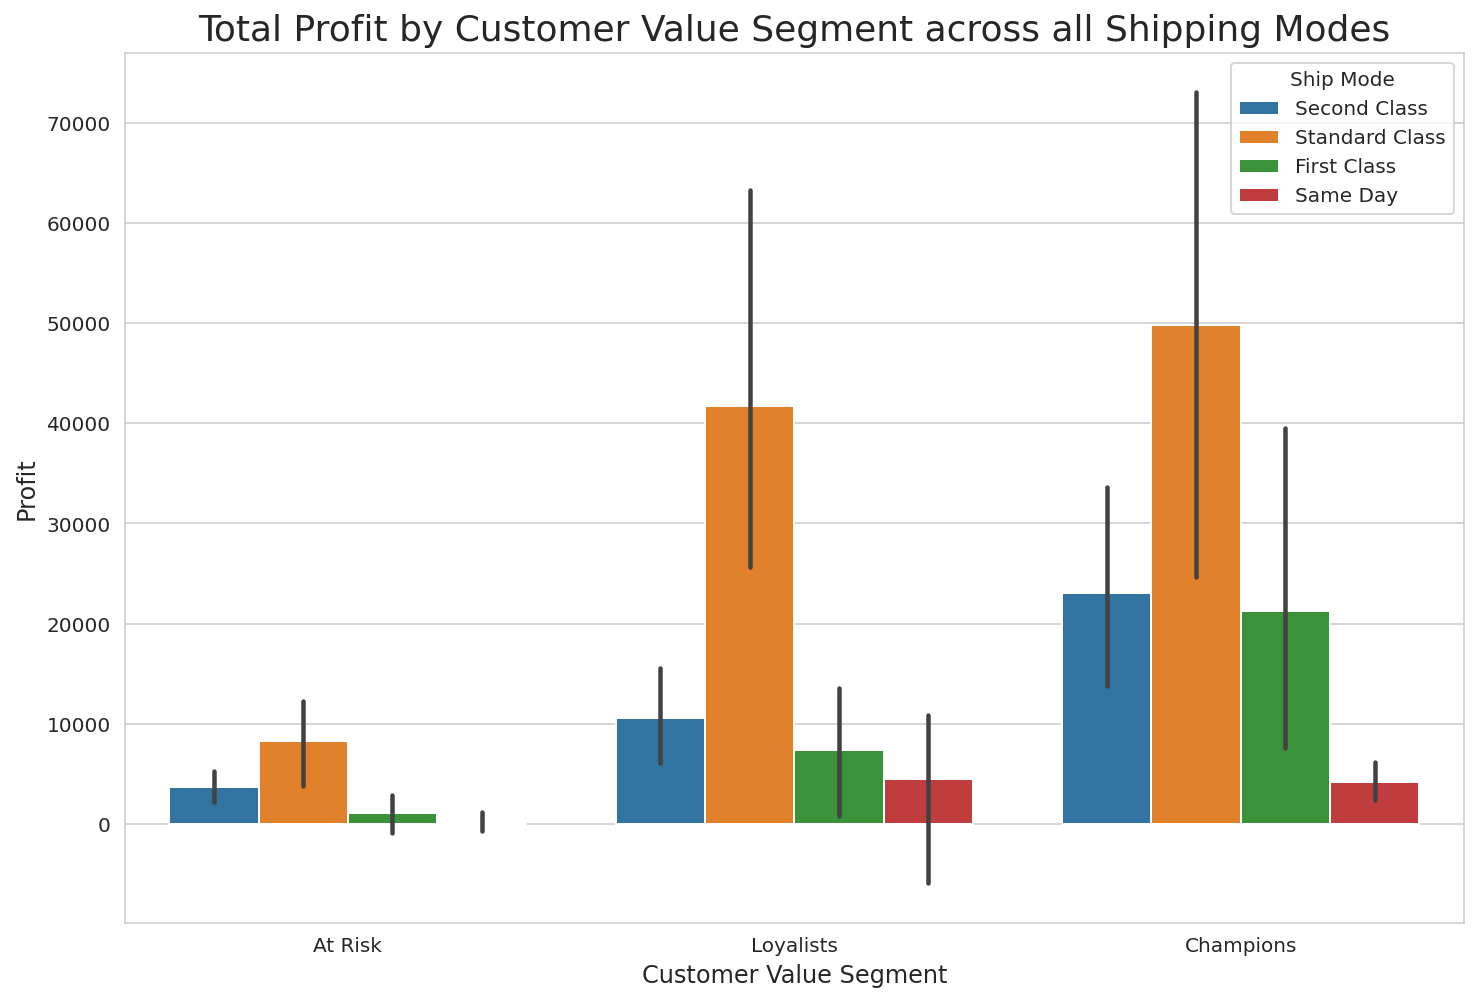

In [66]:
# Check the breakdown of Total Profit by rfm value_segment across all Ship Modes ausing a barplot of Proft vs. value_segment with hue='Ship Mode'

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Value Seg Label", y= "Profit", estimator=np.sum, hue="Ship Mode")
axes.set_xlabel("Customer Value Segment", size=12)
axes.set_ylabel("Profit", size=12)
axes.set_title("Total Profit by Customer Value Segment across all Shipping Modes", size=18)
plt.show()

<u>**Plot Discussion**</u>

Standard Class shipping mode gave the highest total profit  across all customer value segments, While Same Day gave the least total profit. 



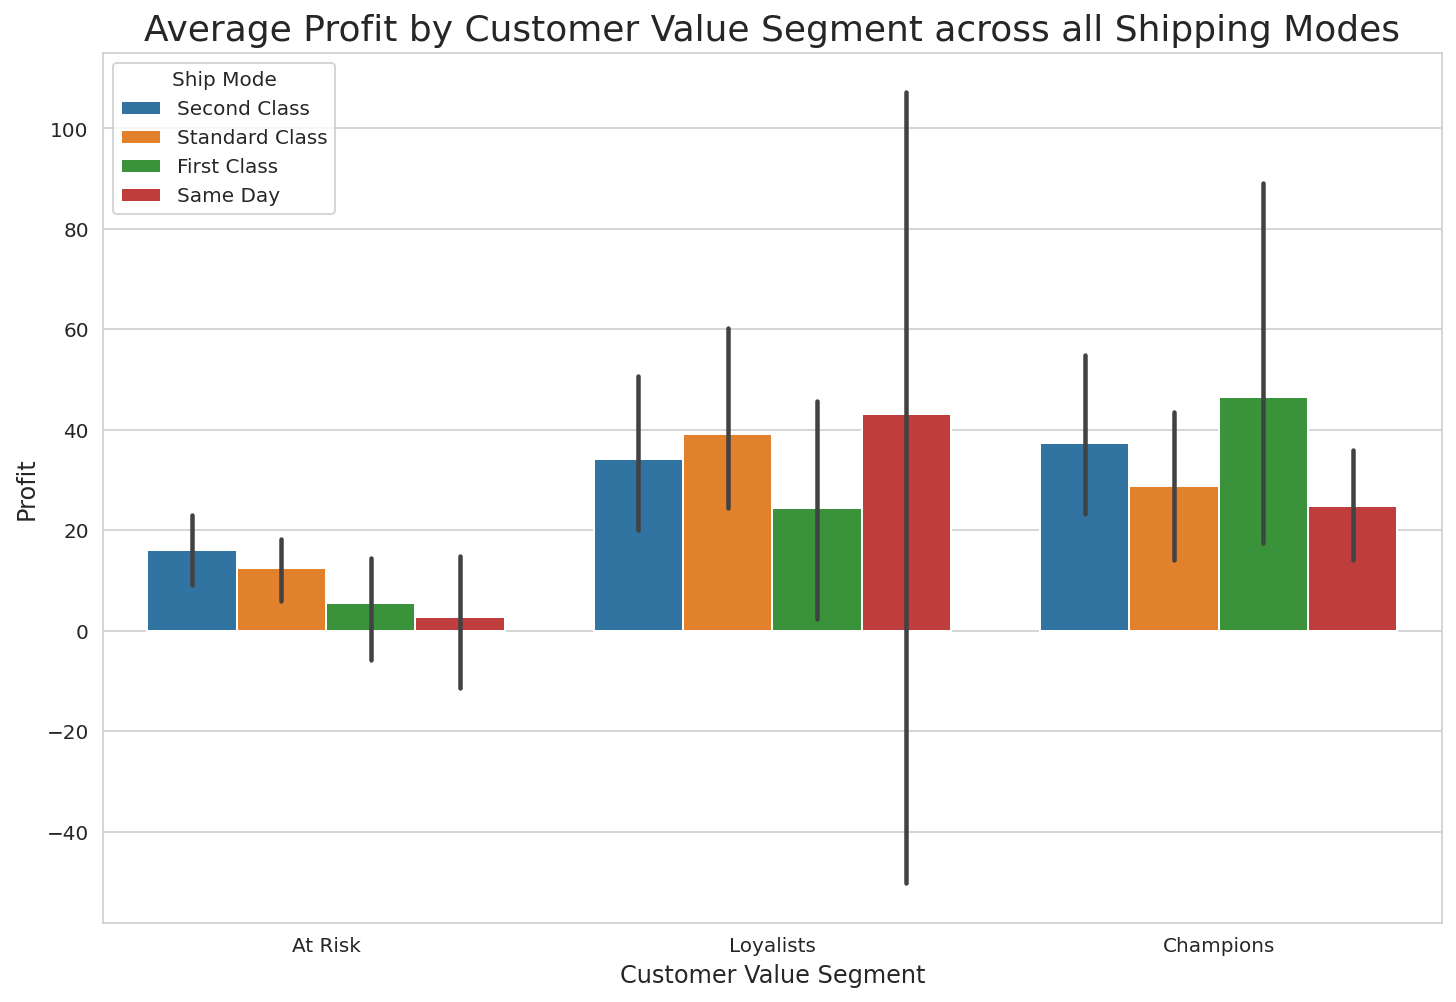

In [67]:
# Check the breakdown of Average Profit by rfm value_segment across all Ship Modes using a barplot of Proft vs. value_segment with estimaton=np.mean and hue='Ship Mode'

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Value Seg Label", y= "Profit", estimator=np.mean, hue="Ship Mode")
axes.set_xlabel("Customer Value Segment", size=12)
axes.set_ylabel("Profit", size=12)
axes.set_title("Average Profit by Customer Value Segment across all Shipping Modes", size=18)
plt.show()

<u>**Plot Discussion**</u>

The average profit among the Champions is highest when first\-class shipping is used. Among the Loyalists, the average profit is highest when same\-day shipping is used, with a very wide standard deviation indicating high volatility in average profit. 


### **Customer Segment Analysis**

In [68]:
#  Check the column names 
obs_df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Value Seg Label',
       'unit_cost'],
      dtype='object')

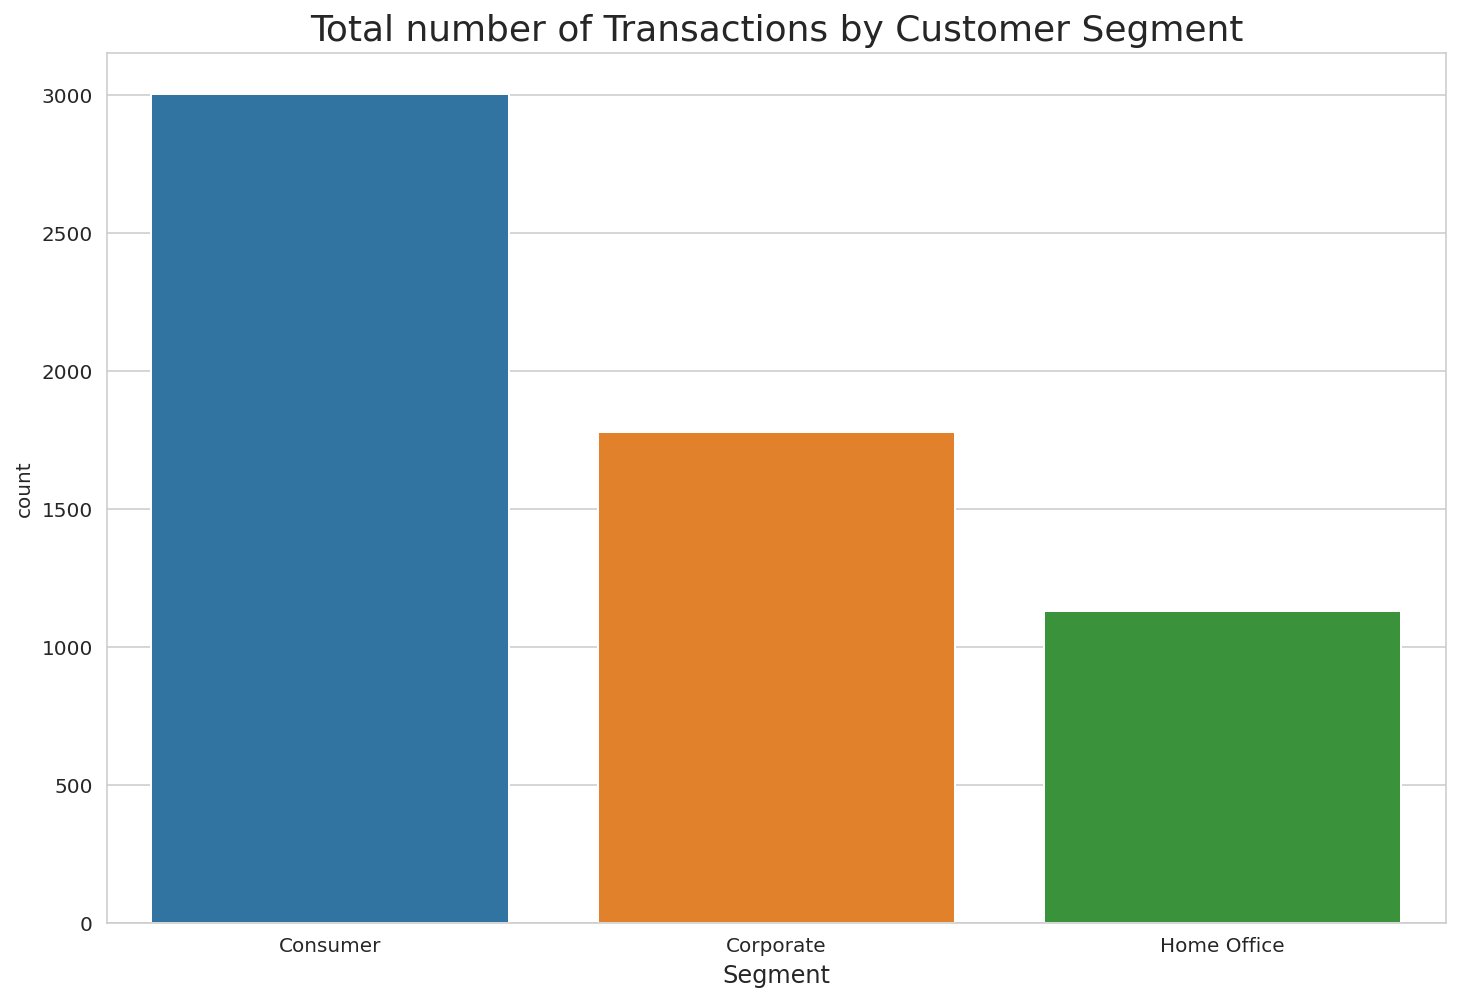

In [69]:
# Check total number of transactions by customer segment using a countplot of Segment

fig, axes=plt.subplots(figsize=(12,8))
sns.countplot(data=obs_df, x= "Segment", hue= "Segment")
axes.set_xlabel("Segment", size=12)
axes.set_title("Total number of Transactions by Customer Segment", size=18)
plt.show()

<u>**Plot Discussion**</u>

The consumer has the highest number of transactions by customer segment, and the home office has the least.



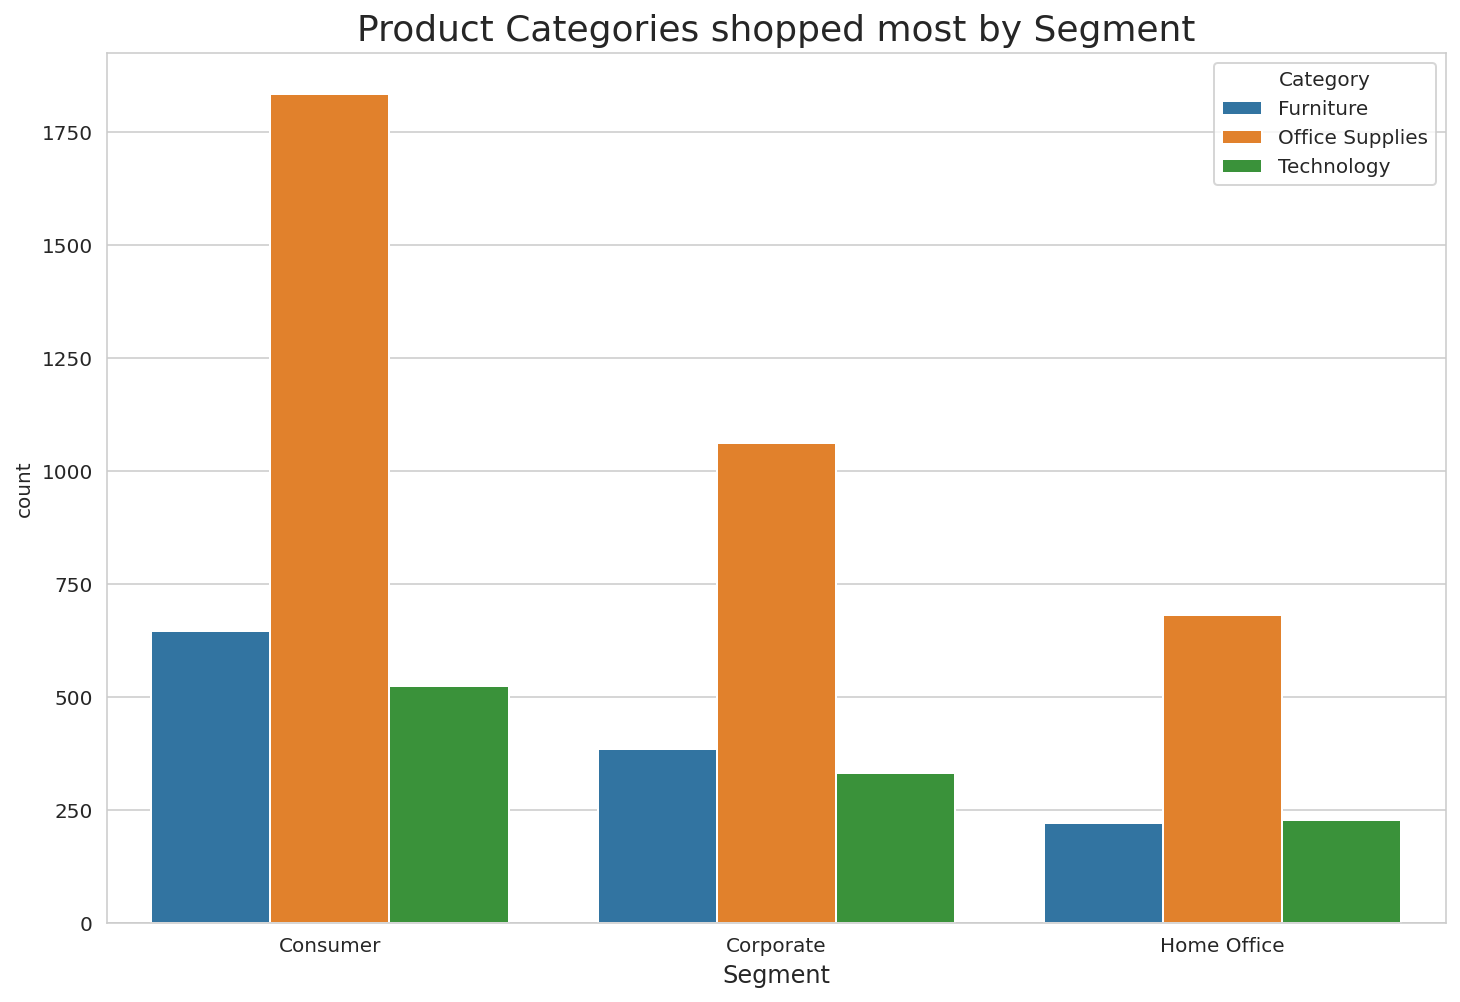

In [70]:
# Check which Product Categories are the Segments shopping the most using a countplot of Segment with hue='Category'

fig, axes=plt.subplots(figsize=(12,8))
sns.countplot(data=obs_df, x= "Segment", hue= "Category")
axes.set_xlabel("Segment", size=12)
axes.set_title("Product Categories shopped most by Segment", size=18)
plt.show()

<u>**Plot Discussion**</u>

Office supplies is the most shopped category across all customer segment



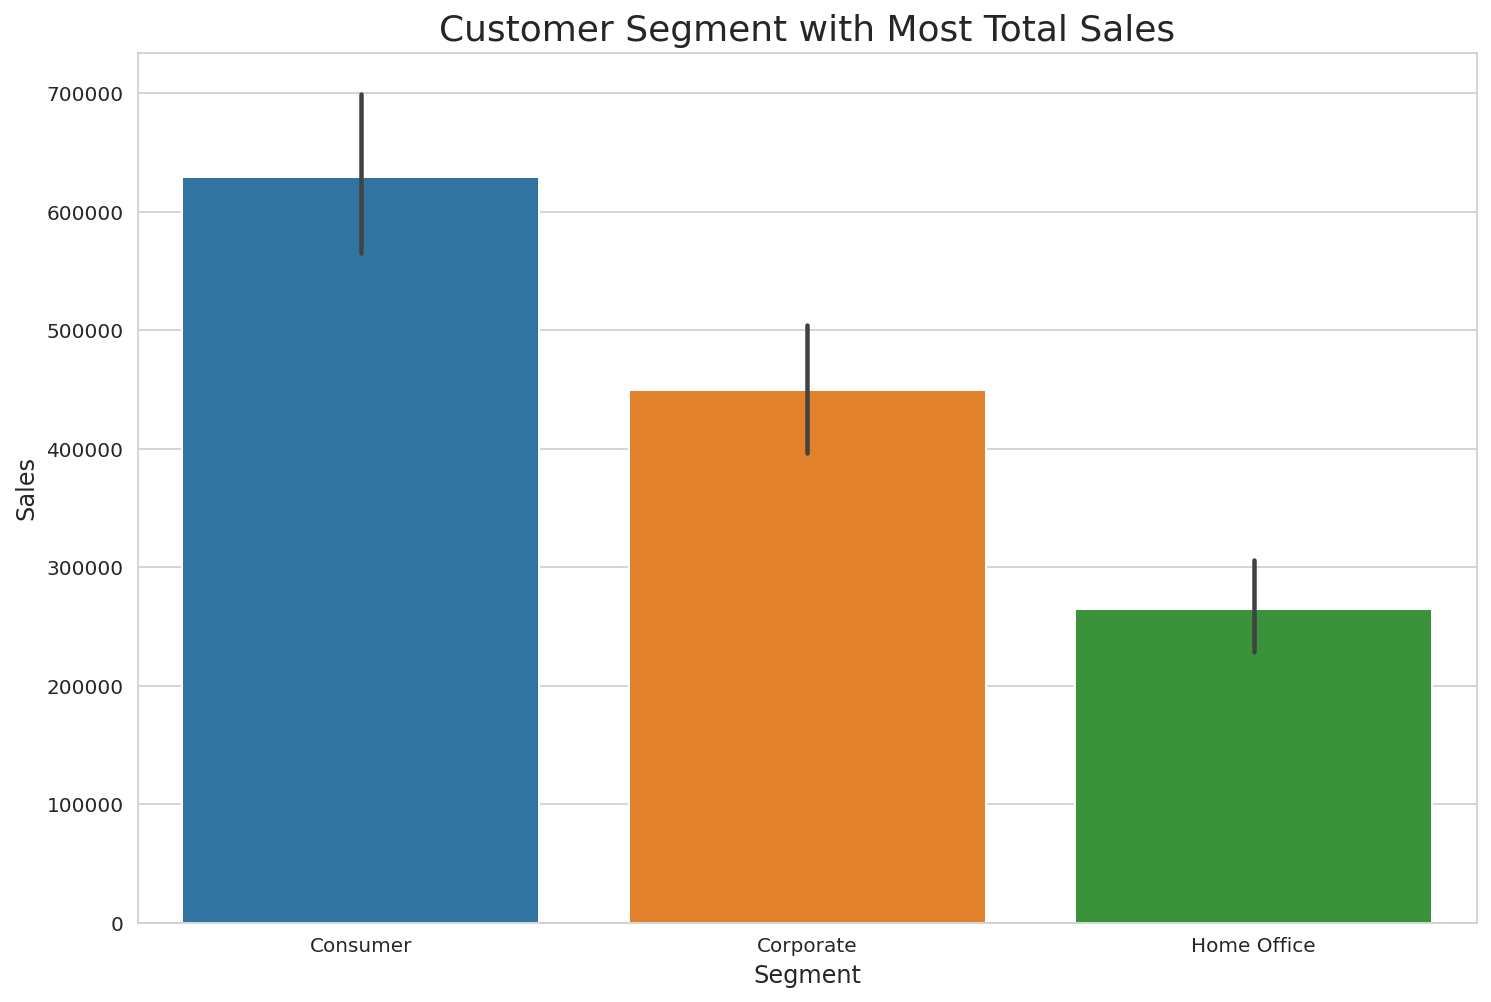

In [71]:
# Check the Customer Segment with most total Sales using a barplot of Sales vs. Segment

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Segment", y= "Sales", estimator=np.sum, hue="Segment" )
axes.set_xlabel("Segment", size=12)
axes.set_ylabel("Sales", size=12)
axes.set_title("Customer Segment with Most Total Sales", size=18)
plt.show()


<u>**Plot Discussion**</u>

The consumer has the highest amount of Sales across all customer segments, and the home office has the least.



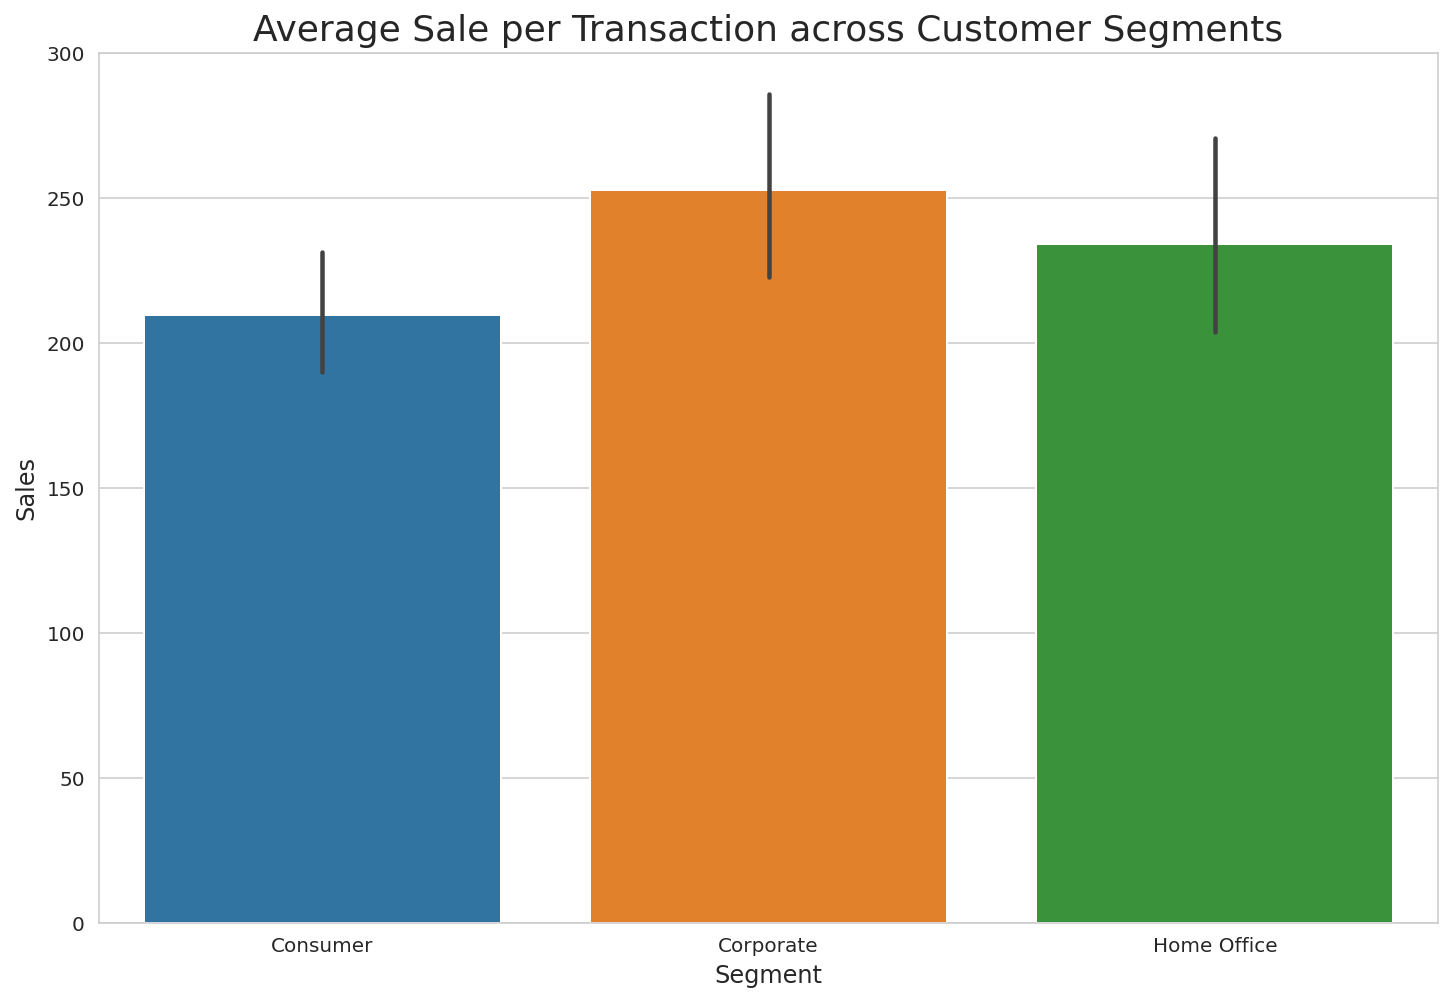

In [72]:
# Check the average Sales per Transaction across customer segments using a barplot of Sales vs. Segment with estimator=np.mean

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Segment", y= "Sales", estimator=np.mean, hue="Segment" )
axes.set_xlabel("Segment", size=12)
axes.set_ylabel("Sales", size=12)
axes.set_title("Average Sale per Transaction across Customer Segments", size=18)
plt.show()


<u>**Plot Discussion**</u>

The Corporate has the highest average sale per transaction across the customer segments, But their significant difference needs to be checked among the other two segments.



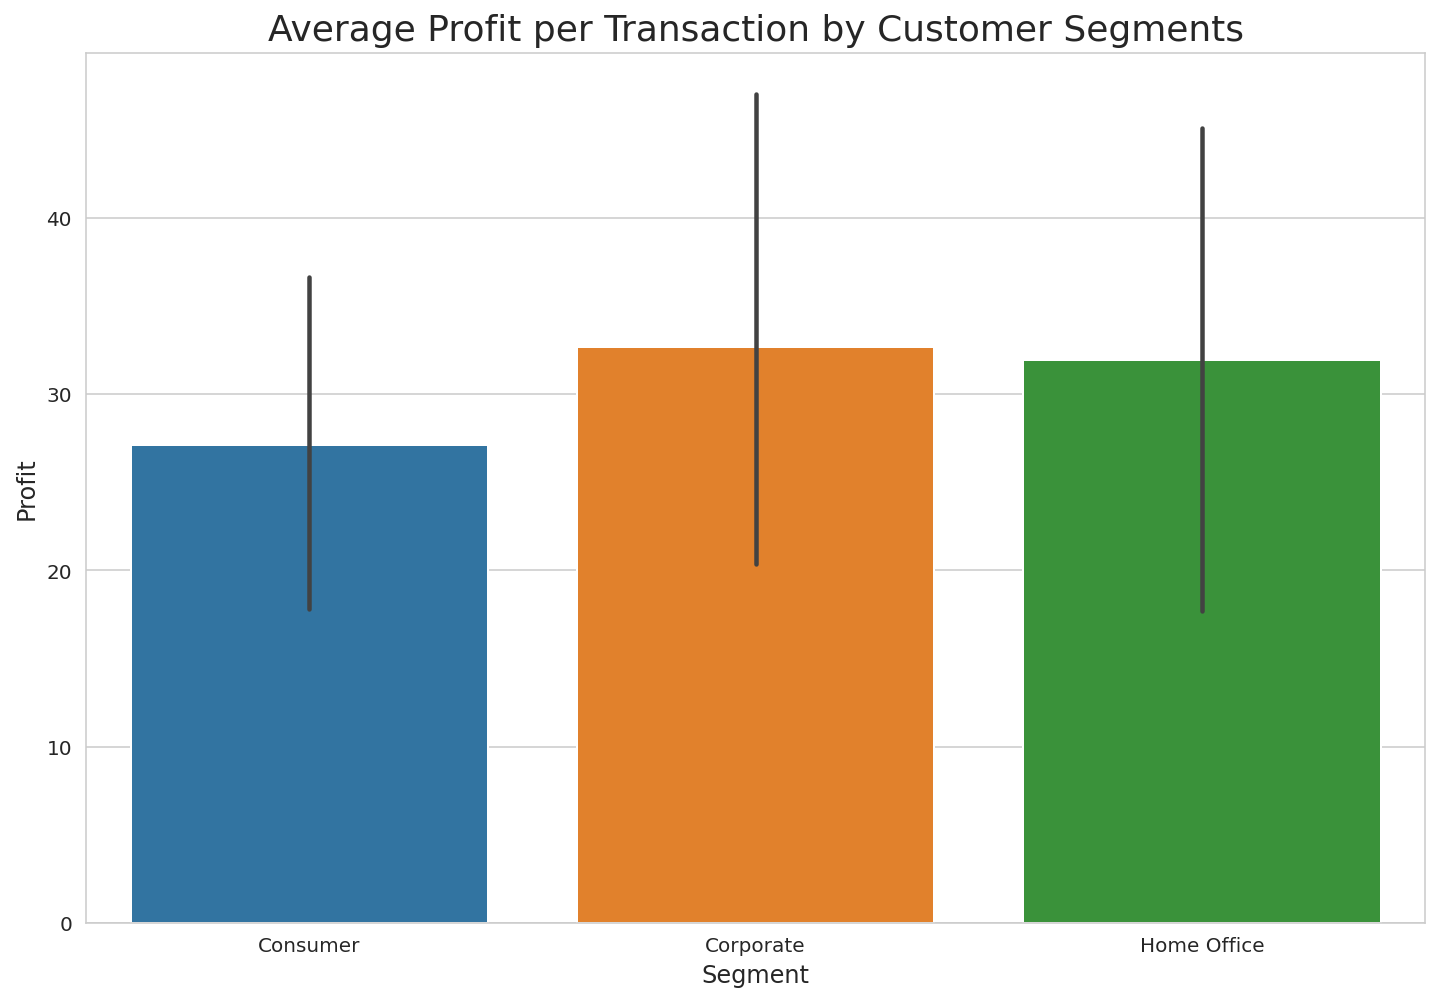

In [73]:
# Check which is the average profit per transaction by Customer Segment using a barplot of Profit vs. Segment with estimator=np.mean

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Segment", y= "Profit", estimator=np.mean, hue="Segment" )
axes.set_xlabel("Segment", size=12)
axes.set_ylabel("Profit", size=12)
axes.set_title("Average Profit per Transaction by Customer Segments", size=18)
plt.show()

<u>**Plot Discussion**</u>

The average profit per transaction is lowest in the Consumer Segment and highest among the Corporate and Home Office Segments. 



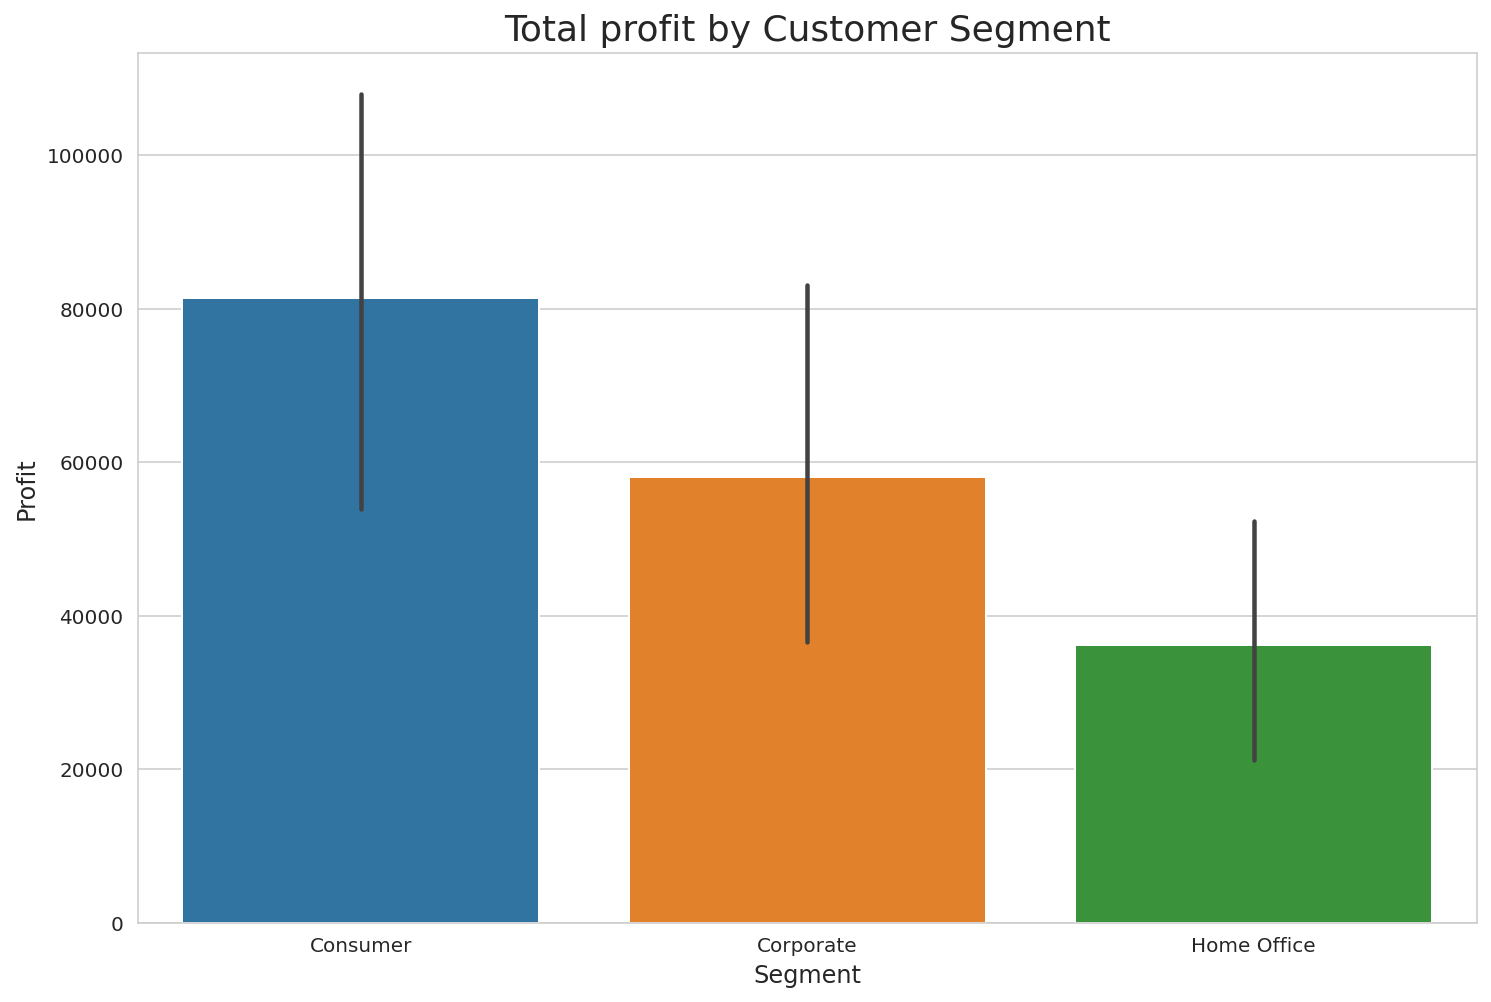

In [74]:
# Check the total profit by Customer Segment using a barplot of Profit vs. Segment

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Segment", y= "Profit", estimator=np.sum, hue="Segment" )
axes.set_xlabel("Segment", size=12)
axes.set_ylabel("Profit", size=12)
axes.set_title("Total profit by Customer Segment", size=18)
plt.show()

<u>**Plot Discussion**</u>

The total profit is highest in the consumer segment and lowest in the home office segment. 



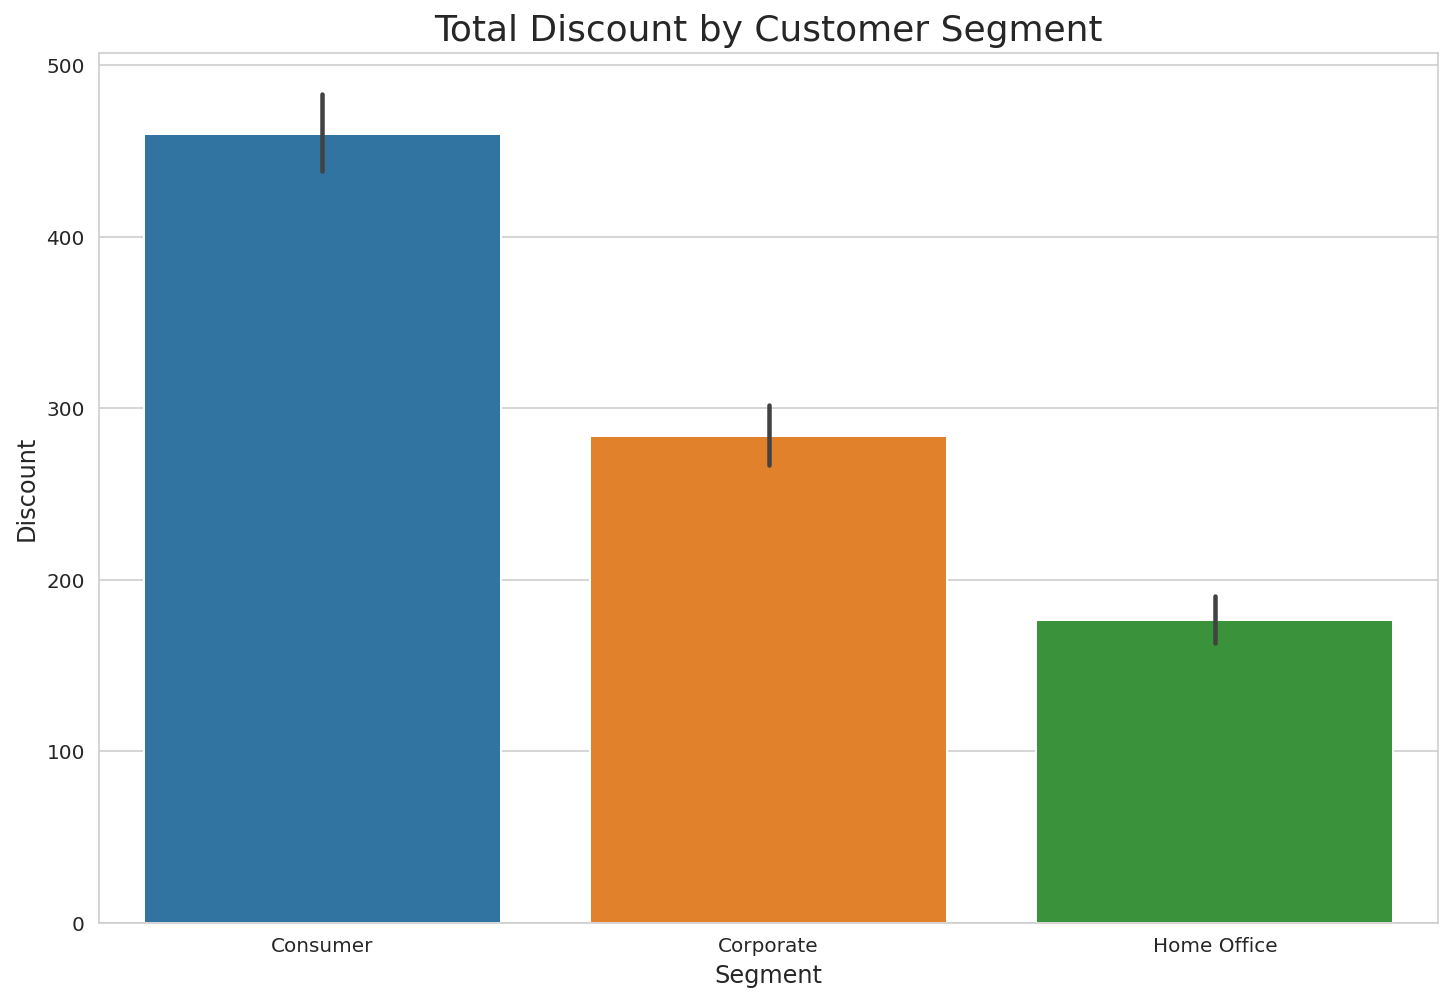

In [75]:
# Check the total amount of discount by customer Segment using a barplot of Discount vs. Segment

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Segment", y= "Discount", estimator=np.sum, hue="Segment" )
axes.set_xlabel("Segment", size=12)
axes.set_ylabel("Discount", size=12)
axes.set_title("Total Discount by Customer Segment", size=18)
plt.show()

<u>**Plot Discussion**</u>

The total Discount is highest in the consumer segment and lowest in the home office segment. 



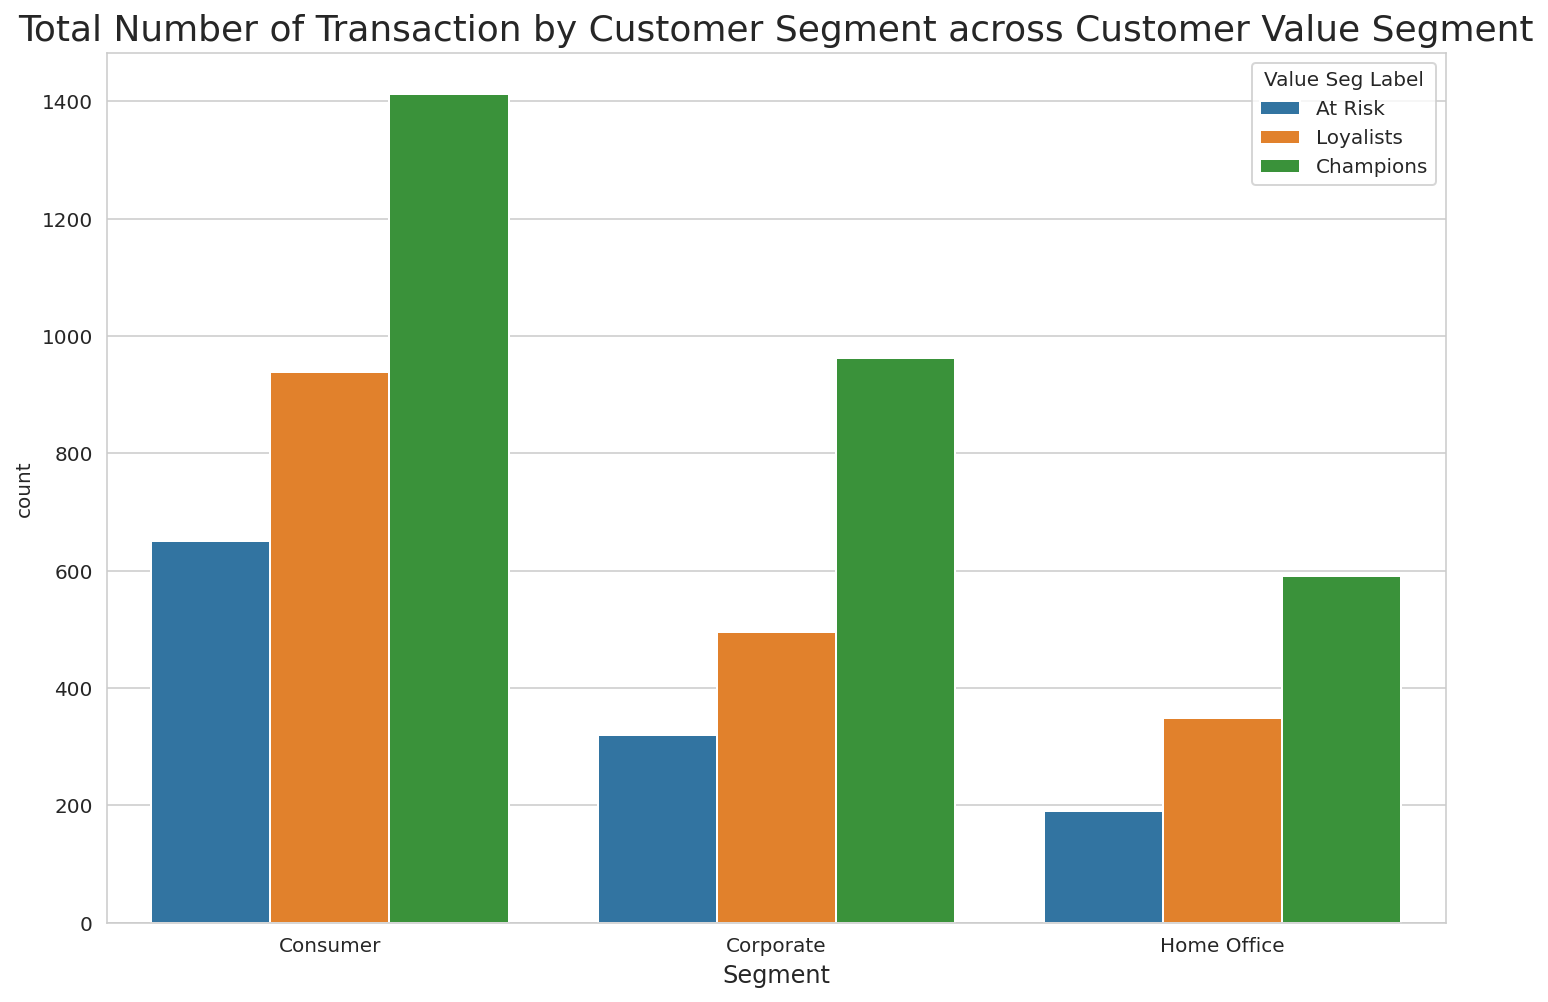

In [76]:
# Check the total number of transactions by Customer Segments by all rfm value_segments using a countplot of Segment with hue='value_segment'

fig, axes=plt.subplots(figsize=(12,8))
sns.countplot(data=obs_df, x= "Segment", hue= "Value Seg Label")
axes.set_xlabel("Segment", size=12)
axes.set_title("Total Number of Transaction by Customer Segment across Customer Value Segment", size=18)
plt.show()

<u>**Plot Discussion**</u>

The Champion has the highest total number of transactions across all consumer segments, and the lowest is observed in the home office segment. 



### **Region Analysis**



In [77]:
# check the column
obs_df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Value Seg Label',
       'unit_cost'],
      dtype='object')

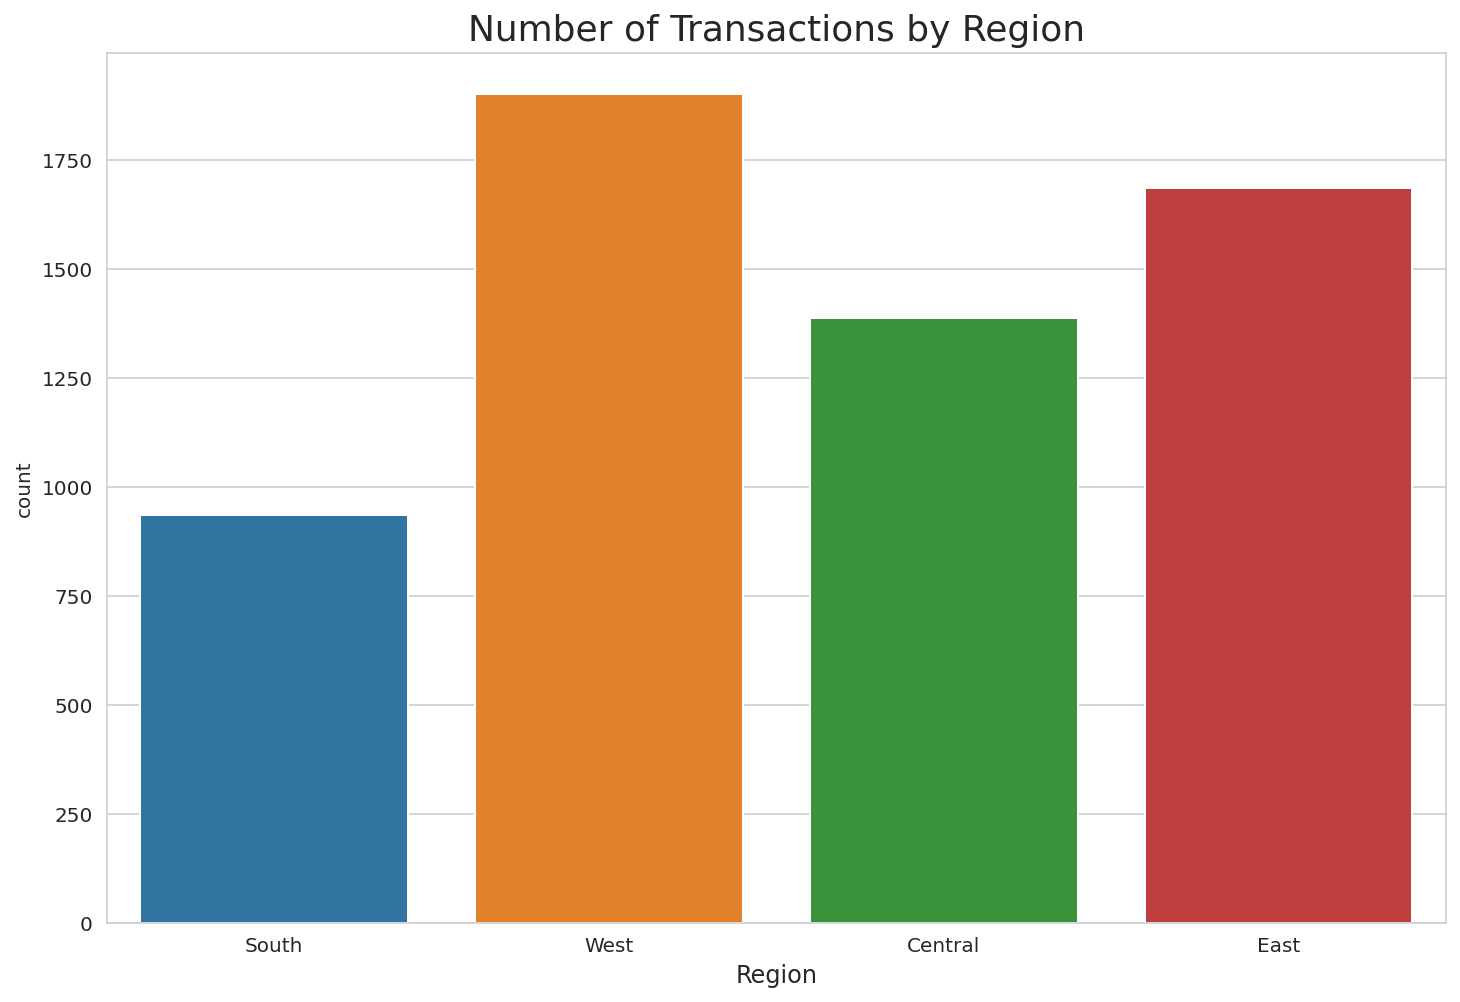

In [78]:
# Check which Region has the most number of transactions using a countplot of Region

fig, axes=plt.subplots(figsize=(12,8))
sns.countplot(data=obs_df, x= "Region", hue= "Region")
axes.set_xlabel("Region", size=12)
axes.set_title("Number of Transactions by Region", size=18)
plt.show()

<u>**Plot Discussion**</u>

The West has the highest number of transactions across all Regions, followed by the East, and the South has the lowest. 



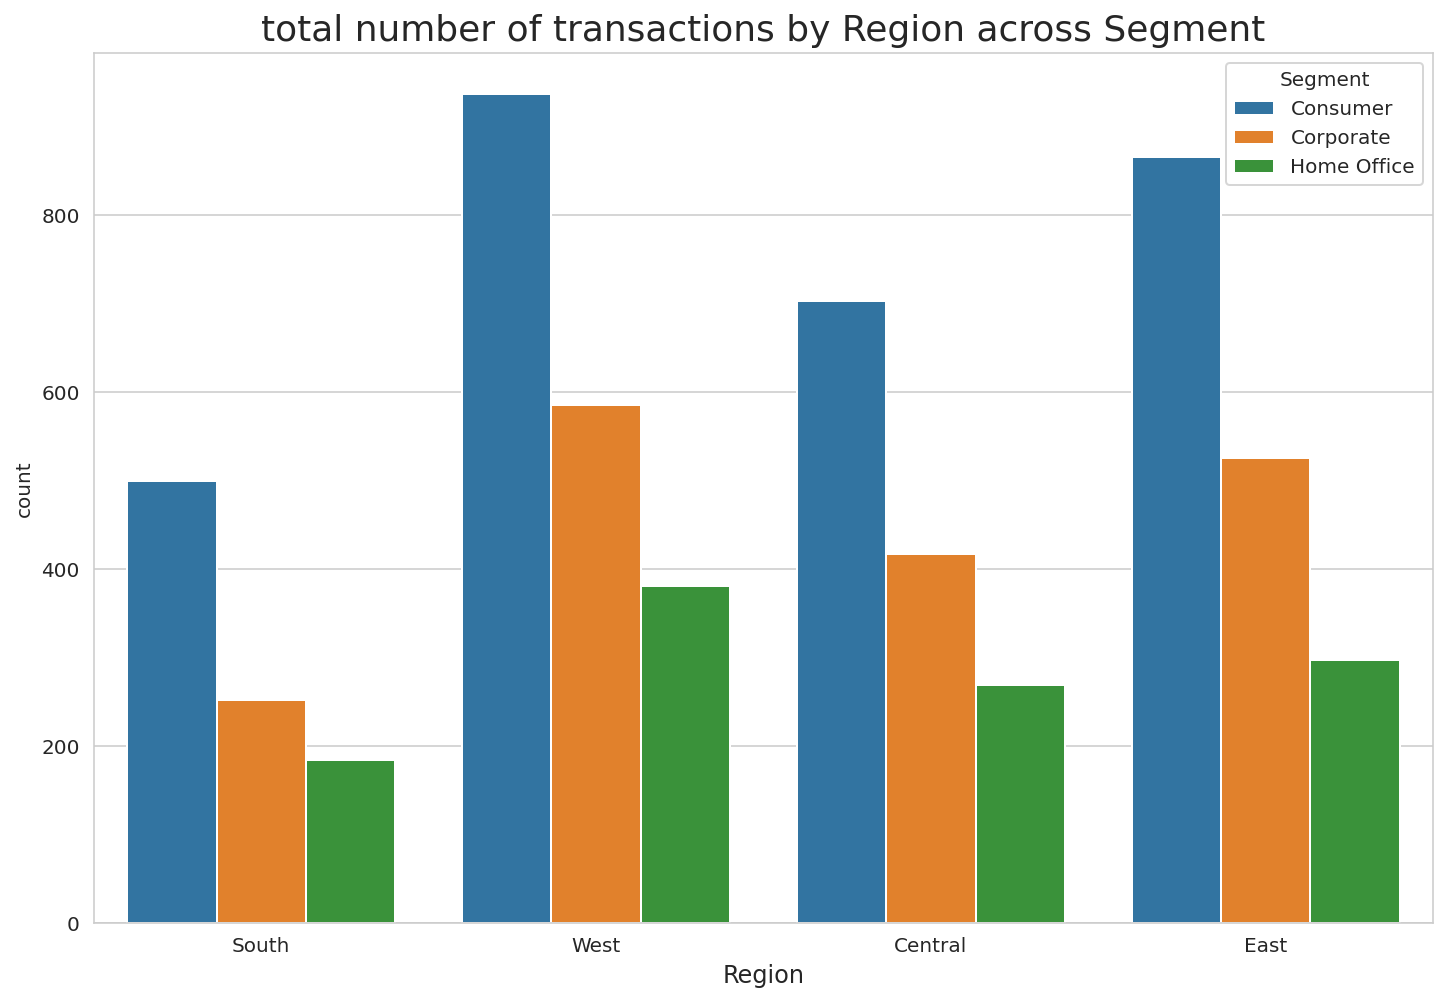

In [79]:
# Check total number of transactions by Region across customer segments using a countplot of region with hue='Segment'

fig, axes=plt.subplots(figsize=(12,8))
sns.countplot(data=obs_df, x= "Region", hue= "Segment")
axes.set_xlabel("Region", size=12)
axes.set_title("total number of transactions by Region across Segment", size=18)
plt.show()

<u>**Plot Discussion**</u>

The Consumer has the highest number of transactions across all Regions, and the Home Office has the lowest.



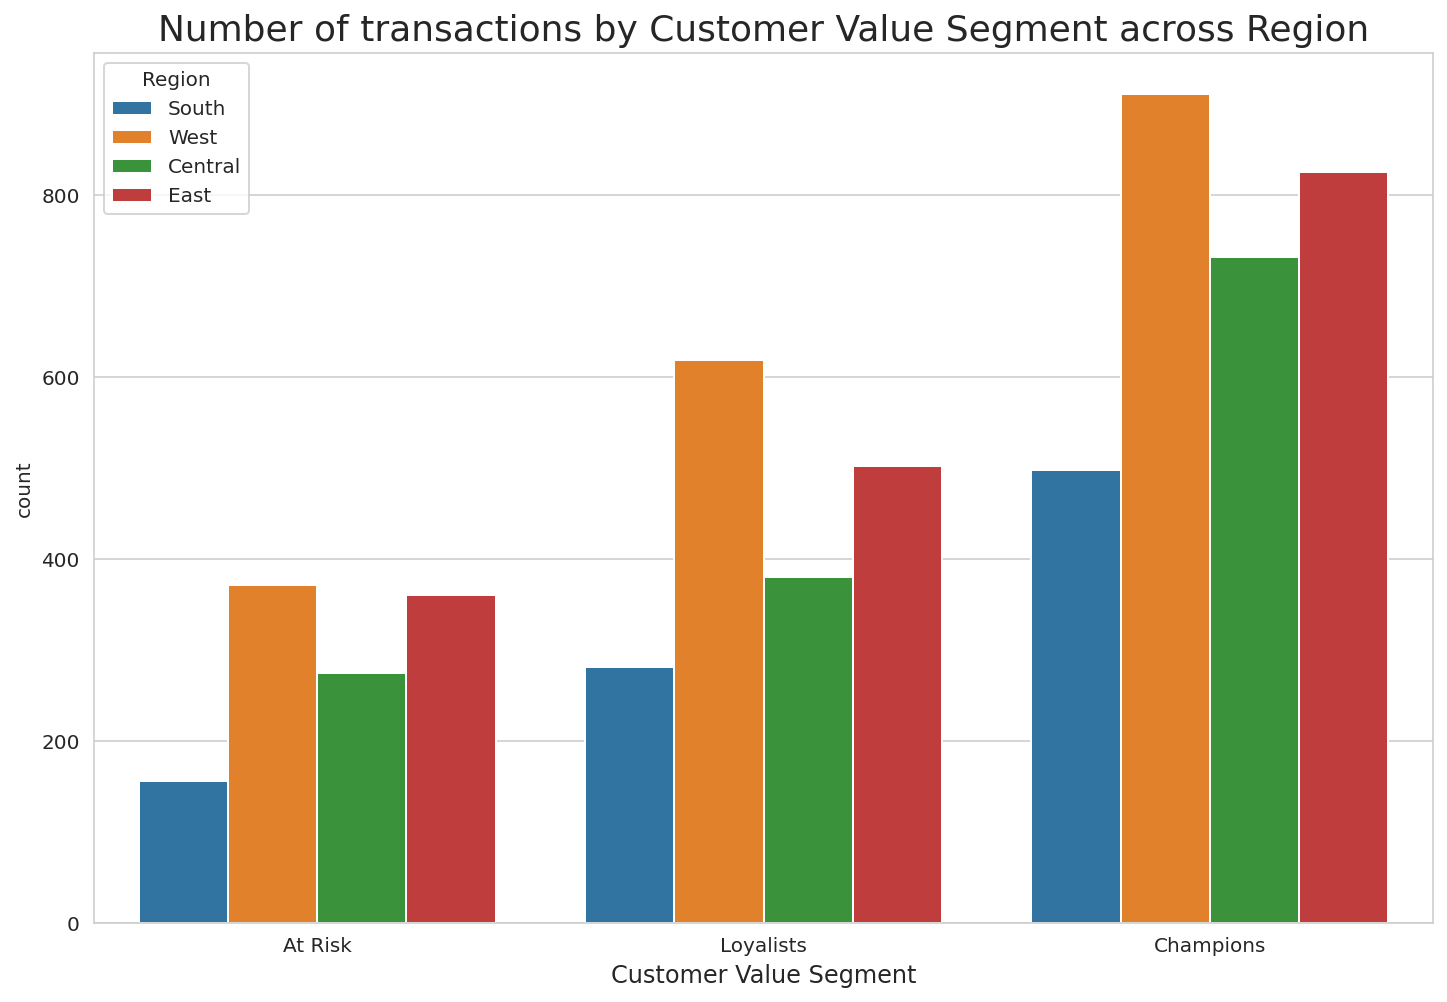

In [80]:
# Check the number of transactions by rfm value segment over all regions using a countplot of rfm value_segment with hue='Region'

fig, axes=plt.subplots(figsize=(12,8))
sns.countplot(data=obs_df, x= "Value Seg Label", hue= "Region")
axes.set_xlabel("Customer Value Segment", size=12)
axes.set_title("Number of transactions by Customer Value Segment across Region", size=18)
plt.show()

<u>**Plot Discussion**</u>

The West has the highest number of transactions across all Customer Value Segments, and the South has the lowest. 



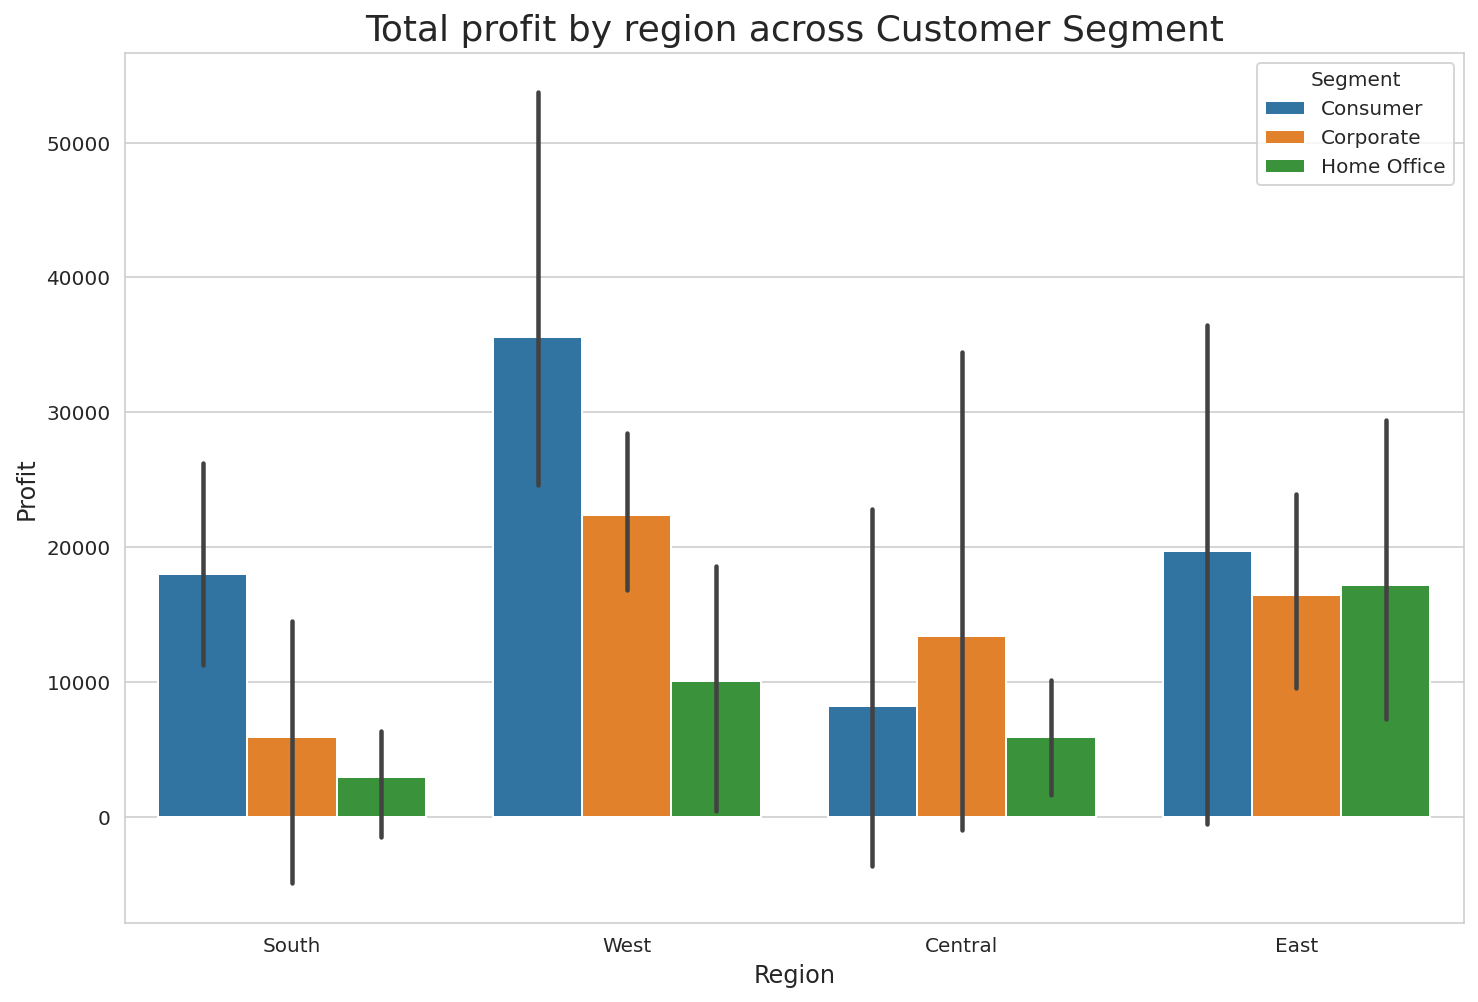

In [81]:
# Check the total profit by region across all customer segments using a barplot of Profit vs. Region with hue='Segmnt'

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Region", y= "Profit", estimator=np.sum, hue="Segment" )
axes.set_xlabel("Region", size=12)
axes.set_ylabel("Profit", size=12)
axes.set_title("Total profit by region across Customer Segment", size=18)
plt.show()

<u>**Plot Discussion**</u>

The Consumer gave the highest total profit across all Regions expect at the central where Corporate gave the highest total profit.



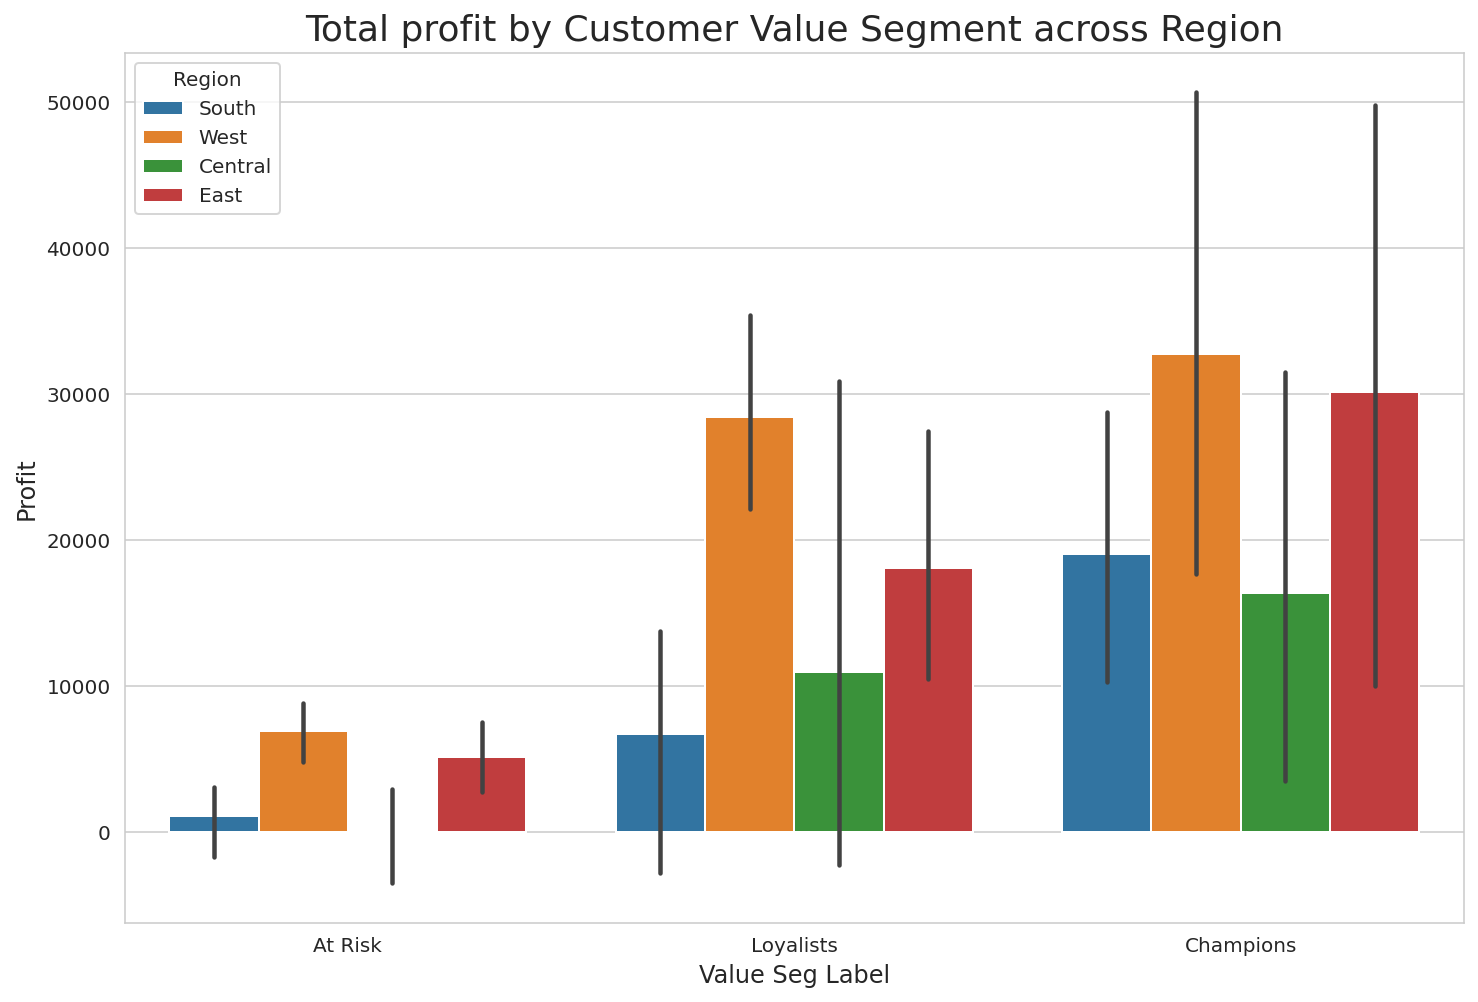

In [82]:
# Check the total profit by rfm value_segment across all regions using a barplot of Profit vs. value_segment with hue='Region'

fig, axes=plt.subplots(figsize=(12,8))
sns.barplot(data = obs_df, x="Value Seg Label", y= "Profit", estimator=np.sum, hue="Region" )
axes.set_xlabel("Value Seg Label", size=12)
axes.set_ylabel("Profit", size=12)
axes.set_title("Total profit by Customer Value Segment across Region", size=18)
plt.show()

<u>**Plot Discussion**</u>

The West region generate the highest total profit across all Customer VAlue Segment, follexpect at the central where Corporate gave the highest total profit.



## Recommendations

Provide recommendations to Superstore based on findings from your analysis.



<u>**Product Category** </u>

**Leverage Office Supplies’ High Transaction Volume:** 

<u>_Increase Promotion and Bundling:_</u> Since office supplies are the most shopped product category with high transaction volume, Superstore can capitalize on this by offering bundle deals or upselling complementary products. Consider cross\-promotions with higher\-margin categories, like technology products, to boost overall profitability.

<u>_Subscription Services:_</u> Implement a subscription\-based model for frequently purchased consumables \(e.g., paper, pens\). This can ensure recurring revenue and customer retention.

**Maximize Technology Category Potential:**

<u>_Targeted Marketing for High\-Value Segments:_</u> Since technology is the most profitable category, focusing on loyal customers and high\-value segments \(e.g., Champions\) with targeted marketing campaigns can further enhance profitability. Highlight premium products and promote technology\-related services like installation or extended warranties.

<u>_Reduce Price Sensitivity:_</u> Given the high average cost and profitability of technology products, consider offering financing options or promoting the long\-term benefits of purchasing higher\-end products to reduce price sensitivity among consumers.

**Optimize Discounts for Strategic Gain:**

<u>_Reduce Office Supplies Discounts:_</u> As office supplies are the most discounted category, reevaluate discount strategies to avoid eroding profit margins. Focus on discounts that drive volume but don't significantly impact profitability.

Maintain Low Discounts for Technology: Continue to limit discounts on technology products since they are the least discounted yet the most profitable. Instead, offer value\-added services or bundle deals to enhance perceived value without sacrificing margin.

**Enhance Customer Experience in the Furniture Category:**

<u>_Focus on Differentiation:_ </u>Despite furniture being the least profitable category, it's essential to differentiate the furniture offerings through unique designs or partnerships with premium brands. Consider improving in\-store displays and offering personalized services, such as interior design consultations, to boost sales and profitability in this category.

**Address At\-Risk Segments with Tailored Strategies:**

<u>_Focus on Office Supplies for At\-Risk Customers:_</u> Given that office supplies lead in the "At\-Risk Segment," consider creating specific campaigns to re\-engage these customers. This might include personalized offers, loyalty rewards, or exclusive discounts on office supplies to draw them back to the store.

**Monitor and Adjust for Profit Volatility:**

<u>_Manage Profit Variation in Technology:_</u> The high standard deviation in profit among Loyalists and Champions suggests volatility. Consider segment\-specific pricing strategies or targeted promotions to smooth out these fluctuations and ensure consistent profitability across customer segments.

**Data\-Driven Decision Making:**

<u>_Continuous Monitoring:_</u> Regularly analyze customer buying behavior, profit margins, and transaction volumes to adjust strategies dynamically. Implement advanced analytics tools to track these metrics in real\-time and enable proactive decision\-making.



<u>**Shipping Mode** </u>

**Promote Standard Class Shipping:** Since Standard Class is the most used and most profitable across all customer segments, continue prioritizing this shipping mode in promotions and default options.

**Evaluate Same\-Day Shipping Profitability:** Given that Same Day shipping yields the lowest total profit, reconsider its pricing or limit its availability to higher\-margin purchases or premium customers.

**Tailor Shipping Options for Champions and Loyalists:**

<u>_For Champions:_</u> Highlight First\-Class shipping as it provides the highest average profit for this segment. Consider offering exclusive deals or free upgrades to this shipping mode for high\-value customers.

<u>_For Loyalists:_</u> Investigate the wide profit variation in Same Day shipping. Consider optimizing pricing or selectively offering this mode based on order size or product category to ensure consistency in profits.



<u>**Customer Segment**</u>

**Focus on Consumer Segment Profitability:** Since the Consumer segment has the highest transactions, sales, and total profit but the lowest profit per transaction, reduce discounting or offer value\-added services to boost profitability without sacrificing volume.

**Increase Engagement with Home Office Segment:** With the lowest number of transactions and sales, target the Home Office segment with tailored marketing campaigns, promotions, and incentives to increase engagement and sales.

**Optimize Corporate Segment Strategies:** The Corporate segment has the highest average sale per transaction and profit. Focus on nurturing this segment with premium offerings and personalized services while investigating profit differences with other segments to identify optimization opportunities.

**Enhance Champion Value Segment Strategies:** Since Champions have the highest transactions across all segments, consider offering loyalty rewards and exclusive deals to maintain their engagement and drive higher sales.

**Review Discount Strategy:** Reevaluate discount strategies, especially in the Consumer segment, to prevent erosion of profit margins while maintaining competitiveness. Consider targeted discounts for underperforming segments like Home Office.



<u>**Region**</u><u> </u>

**Focus on the West Region:** Since the West has the highest number of transactions and total profit, continue investing in this region with targeted promotions, expanded inventory, and personalized marketing to maintain and boost its performance.

**Increase Engagement in the South:** With the lowest transaction volume, prioritize efforts to boost sales in the South. Consider localized marketing campaigns, special promotions, or partnerships to attract more customers and improve profitability in this region.

**Strengthen Consumer Segment Across Regions:** As the Consumer segment consistently drives the highest transactions and profit, focus on enhancing the customer experience and loyalty programs for consumers across all regions, while maintaining competitive pricing and product offerings.

**Leverage Corporate Success in the Central Region:** Since the Corporate segment leads in total profit in the Central region, further capitalize on this by offering tailored corporate services, exclusive deals, and premium products to strengthen corporate relationships in this area.

**Tailor Strategies by Region and Segment:** Implement region\-specific strategies to cater to unique customer behaviors. For example, focus on boosting the Home Office segment in underperforming regions and replicating the successful Corporate strategies from the Central region in other areas.
